# What can hosts do to become a Super-Host?


There are 2 categories of host in Airbnb; Superhost and regular host. All hosts will begin as a regular host and will attain the superhost status after they complete the following achievements: 4.8+ overall rating, 10+ stays, <1% cancellation rate, 90% response rate. Superhosts often benefit from a significant increase in earnings. Their listings are more visible and will be featured in search results. Our group aims to make recommendations for regular hosts to attain the coveted superhost status. 

# Step 1. Import CSV files and libraries


In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline 
import plotly as py
from plotly.offline import iplot, plot, init_notebook_mode, download_plotlyjs
import plotly.graph_objs as go
init_notebook_mode(connected=True)
import plotly.offline as offline

import seaborn as sns
import matplotlib.pyplot as plt

import os
import nltk

# Any results you write to the current directory are saved as output.

In [2]:
airbnb = pd.read_csv('listings.csv',encoding='ISO-8859-1')

In [3]:
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
id                                  3818 non-null int64
listing_url                         3818 non-null object
scrape_id                           3818 non-null int64
last_scraped                        3818 non-null object
name                                3818 non-null object
summary                             3641 non-null object
space                               3249 non-null object
description                         3818 non-null object
experiences_offered                 3818 non-null object
neighborhood_overview               2786 non-null object
notes                               2212 non-null object
transit                             2884 non-null object
thumbnail_url                       3498 non-null object
medium_url                          3498 non-null object
picture_url                         3818 non-null object
xl_picture_url                      3498

In [4]:
cal=pd.read_csv('calendar.csv')
cal.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [5]:
listing_sel_df = pd.DataFrame(airbnb[[
"id",
"neighborhood_overview",
"host_id",
"host_since",
"host_location",
"host_response_time",
"host_response_rate",
"host_acceptance_rate",
"host_is_superhost",
"host_total_listings_count",
"host_verifications",
"host_has_profile_pic",
"latitude",
"longitude",
"is_location_exact",
"property_type",
"room_type",
"accommodates",                     
"bathrooms",                       
"bedrooms",
"beds",                                                
"bed_type",
"price",
"weekly_price",
"monthly_price",
"cleaning_fee",
"number_of_reviews",
"review_scores_rating",
"review_scores_accuracy",
"review_scores_cleanliness",
"review_scores_checkin",
"review_scores_communication",
"review_scores_location",
"requires_license",
"reviews_per_month",
"instant_bookable",
"cancellation_policy",
"calculated_host_listings_count",
"extra_people",
]])


In [6]:
listing_sel_df.head() #original dataframe with the columns that we need

,id,neighborhood_overview,host_id,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,requires_license,reviews_per_month,instant_bookable,cancellation_policy,calculated_host_listings_count,extra_people
0,241032,NaN,956883,2011-08-11,"Seattle, Washington, United States",within a few hours,96%,100%,f,3.0,...,10.0,10.0,10.0,9.0,f,4.07,f,moderate,2,$5.00
1,953595,"Queen Anne is a wonderful, truly functional vi...",5177328,2013-02-21,"Seattle, Washington, United States",within an hour,98%,100%,t,6.0,...,10.0,10.0,10.0,10.0,f,1.48,f,strict,6,$0.00
2,3308979,Upper Queen Anne is a charming neighborhood fu...,16708587,2014-06-12,"Seattle, Washington, United States",within a few hours,67%,100%,f,2.0,...,10.0,10.0,10.0,10.0,f,1.15,f,strict,2,$25.00
3,7421966,NaN,9851441,2013-11-06,"Seattle, Washington, United States",NaN,NaN,NaN,f,1.0,...,NaN,NaN,NaN,NaN,f,NaN,f,flexible,1,$0.00
4,278830,We are in the beautiful neighborhood of Queen ...,1452570,2011-11-29,"Seattle, Washington, United States",within an hour,100%,NaN,f,2.0,...,9.0,10.0,10.0,9.0,f,0.89,f,strict,1,$15.00


In [7]:
listing_sel_df.info() # merged dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 39 columns):
id                                3818 non-null int64
neighborhood_overview             2786 non-null object
host_id                           3818 non-null int64
host_since                        3816 non-null object
host_location                     3810 non-null object
host_response_time                3295 non-null object
host_response_rate                3295 non-null object
host_acceptance_rate              3045 non-null object
host_is_superhost                 3816 non-null object
host_total_listings_count         3816 non-null float64
host_verifications                3818 non-null object
host_has_profile_pic              3816 non-null object
latitude                          3818 non-null float64
longitude                         3818 non-null float64
is_location_exact                 3818 non-null object
property_type                     3817 non-null object
room_type   

In [8]:
listing_sel_df.shape

(3818, 39)

In [9]:
listing_sel_df['price'].head()

0     $85.00
1    $150.00
2    $975.00
3    $100.00
4    $450.00
Name: price, dtype: object

# Step 2: Clean the data 

In [10]:
#Check all the Null Values.
listing_sel_df.isnull().sum()

id                                   0
neighborhood_overview             1032
host_id                              0
host_since                           2
host_location                        8
host_response_time                 523
host_response_rate                 523
host_acceptance_rate               773
host_is_superhost                    2
host_total_listings_count            2
host_verifications                   0
host_has_profile_pic                 2
latitude                             0
longitude                            0
is_location_exact                    0
property_type                        1
room_type                            0
accommodates                         0
bathrooms                           16
bedrooms                             6
beds                                 1
bed_type                             0
price                                0
weekly_price                      1809
monthly_price                     2301
cleaning_fee             

In [11]:
# Cleaning all the NaN data
listing_sel_df['review_scores_rating'].fillna(0, inplace=True)
listing_sel_df['review_scores_accuracy'].fillna(0, inplace=True)
listing_sel_df['review_scores_checkin'].fillna(0, inplace=True)
listing_sel_df['review_scores_communication'].fillna(0, inplace=True)
listing_sel_df['review_scores_location'].fillna(0, inplace=True)
listing_sel_df['review_scores_cleanliness'].fillna(0, inplace=True)
listing_sel_df['cleaning_fee'].fillna(0, inplace=True)
listing_sel_df['host_response_rate'].fillna(0, inplace=True)
listing_sel_df['weekly_price'].fillna(0, inplace=True)
listing_sel_df['host_response_time'].fillna('Unknown', inplace=True)
listing_sel_df['host_since'].fillna('Unknown', inplace=True)
listing_sel_df['neighborhood_overview'].fillna('Unknown', inplace=True)

In [12]:
#Clean cleaning_fee
listing_sel_df['cleaning_fee']=listing_sel_df['cleaning_fee'].str.replace('$','')
listing_sel_df['cleaning_fee']=listing_sel_df['cleaning_fee'].str.replace(',','')
listing_sel_df[listing_sel_df['cleaning_fee'].notna()]
listing_sel_df['cleaning_fee']=listing_sel_df['cleaning_fee'].astype(float)
listing_sel_df['cleaning_fee'].fillna(0, inplace=True)

#Clean price
listing_sel_df['price']=listing_sel_df['price'].str.replace('$','')
listing_sel_df['price']=listing_sel_df['price'].str.replace(',','')
listing_sel_df[listing_sel_df['price'].notna()]
listing_sel_df['price']=listing_sel_df['price'].astype(float)

#Clean Weekly price (Add 0 to null value first)
listing_sel_df['weekly_price']=listing_sel_df['weekly_price'].str.replace('$','')
listing_sel_df['weekly_price']=listing_sel_df['weekly_price'].str.replace(',','')
listing_sel_df[listing_sel_df['weekly_price'].notna()]
listing_sel_df['weekly_price']=listing_sel_df['weekly_price'].astype(float)
listing_sel_df['weekly_price'].fillna(0, inplace=True)

#Clean Monthly price (Add 0 to null value first)
listing_sel_df['monthly_price']=listing_sel_df['monthly_price'].str.replace('$','')
listing_sel_df['monthly_price']=listing_sel_df['monthly_price'].str.replace(',','')
listing_sel_df[listing_sel_df['monthly_price'].notna()]
listing_sel_df['monthly_price']=listing_sel_df['monthly_price'].astype(float)
listing_sel_df['monthly_price'].fillna(0, inplace=True)

In [13]:
#Clean host_response_rate
listing_sel_df['host_response_rate']=listing_sel_df['host_response_rate'].str.replace('%','')
listing_sel_df['host_response_rate'].fillna(0, inplace=True)
listing_sel_df[listing_sel_df['host_response_rate'].notna()]
listing_sel_df['host_response_rate']=listing_sel_df['host_response_rate'].astype(int)

#Clean host_response_rate
listing_sel_df['host_acceptance_rate']=listing_sel_df['host_acceptance_rate'].str.replace('%','')
listing_sel_df['host_acceptance_rate'].fillna(0, inplace=True)
listing_sel_df[listing_sel_df['host_acceptance_rate'].notna()]
listing_sel_df['host_acceptance_rate']=listing_sel_df['host_acceptance_rate'].astype(int)

In [14]:
# Function to update Weekly_price and Monthly_price if it is empty.
listing_sel_df['weekly_price'] = listing_sel_df.apply(lambda x: x['price']*7 if x['weekly_price'] == 0 else x['weekly_price'], axis=1)
listing_sel_df['monthly_price'] = listing_sel_df.apply(lambda x: x['price']*30 if x['monthly_price'] == 0 else x['monthly_price'], axis=1)

In [15]:
#Check all the null values is filled up 
listing_sel_df.isnull().sum()

id                                  0
neighborhood_overview               0
host_id                             0
host_since                          0
host_location                       8
host_response_time                  0
host_response_rate                  0
host_acceptance_rate                0
host_is_superhost                   2
host_total_listings_count           2
host_verifications                  0
host_has_profile_pic                2
latitude                            0
longitude                           0
is_location_exact                   0
property_type                       1
room_type                           0
accommodates                        0
bathrooms                          16
bedrooms                            6
beds                                1
bed_type                            0
price                               0
weekly_price                        0
monthly_price                       0
cleaning_fee                        0
number_of_re

In [16]:
listing_sel_df.describe()

,id,host_id,host_response_rate,host_acceptance_rate,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,...,cleaning_fee,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,reviews_per_month,calculated_host_listings_count
count,3.818000e+03,3.818000e+03,3818.000000,3818.000000,3816.000000,3818.000000,3818.000000,3818.000000,3802.000000,3812.000000,...,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3191.000000,3818.000000
mean,5.550111e+06,1.578556e+07,81.888947,79.727606,7.157757,47.628961,-122.333103,3.349398,1.259469,1.307712,...,45.062860,22.223415,78.518596,7.975642,7.921949,8.100052,8.136983,7.960450,2.078919,2.946307
std,2.962660e+06,1.458382e+07,34.441009,40.208120,28.628149,0.043052,0.031745,1.977599,0.590369,0.883395,...,49.913798,37.730892,35.979061,3.694899,3.671283,3.736184,3.725777,3.667938,1.822348,5.893029
min,3.335000e+03,4.193000e+03,0.000000,0.000000,1.000000,47.505088,-122.417219,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.020000,1.000000
25%,3.258256e+06,3.275204e+06,88.000000,100.000000,1.000000,47.609418,-122.354320,2.000000,1.000000,1.000000,...,0.000000,2.000000,87.000000,9.000000,9.000000,9.000000,9.000000,9.000000,0.695000,1.000000
50%,6.118244e+06,1.055814e+07,100.000000,100.000000,1.000000,47.623601,-122.328874,3.000000,1.000000,1.000000,...,30.000000,9.000000,95.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.540000,1.000000
75%,8.035127e+06,2.590309e+07,100.000000,100.000000,3.000000,47.662694,-122.310800,4.000000,1.000000,2.000000,...,65.000000,26.000000,98.000000,10.000000,10.000000,10.000000,10.000000,10.000000,3.000000,2.000000
max,1.034016e+07,5.320861e+07,100.000000,100.000000,502.000000,47.733358,-122.240607,16.000000,8.000000,7.000000,...,300.000000,474.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,12.150000,37.000000


In [17]:
listing_sel_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 39 columns):
id                                3818 non-null int64
neighborhood_overview             3818 non-null object
host_id                           3818 non-null int64
host_since                        3818 non-null object
host_location                     3810 non-null object
host_response_time                3818 non-null object
host_response_rate                3818 non-null int64
host_acceptance_rate              3818 non-null int64
host_is_superhost                 3816 non-null object
host_total_listings_count         3816 non-null float64
host_verifications                3818 non-null object
host_has_profile_pic              3816 non-null object
latitude                          3818 non-null float64
longitude                         3818 non-null float64
is_location_exact                 3818 non-null object
property_type                     3817 non-null object
room_type     

In [18]:
listing_sel_df.head()

,id,neighborhood_overview,host_id,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,requires_license,reviews_per_month,instant_bookable,cancellation_policy,calculated_host_listings_count,extra_people
0,241032,Unknown,956883,2011-08-11,"Seattle, Washington, United States",within a few hours,96,100,f,3.0,...,10.0,10.0,10.0,9.0,f,4.07,f,moderate,2,$5.00
1,953595,"Queen Anne is a wonderful, truly functional vi...",5177328,2013-02-21,"Seattle, Washington, United States",within an hour,98,100,t,6.0,...,10.0,10.0,10.0,10.0,f,1.48,f,strict,6,$0.00
2,3308979,Upper Queen Anne is a charming neighborhood fu...,16708587,2014-06-12,"Seattle, Washington, United States",within a few hours,67,100,f,2.0,...,10.0,10.0,10.0,10.0,f,1.15,f,strict,2,$25.00
3,7421966,Unknown,9851441,2013-11-06,"Seattle, Washington, United States",Unknown,0,0,f,1.0,...,0.0,0.0,0.0,0.0,f,NaN,f,flexible,1,$0.00
4,278830,We are in the beautiful neighborhood of Queen ...,1452570,2011-11-29,"Seattle, Washington, United States",within an hour,100,0,f,2.0,...,9.0,10.0,10.0,9.0,f,0.89,f,strict,1,$15.00


In [19]:
cal.describe()

,listing_id
count,1.393570e+06
mean,5.550111e+06
std,2.962274e+06
min,3.335000e+03
25%,3.258213e+06
50%,6.118244e+06
75%,8.035212e+06
max,1.034016e+07


In [20]:
cal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
listing_id    1393570 non-null int64
date          1393570 non-null object
available     1393570 non-null object
price         934542 non-null object
dtypes: int64(1), object(3)
memory usage: 42.5+ MB


In [21]:
#filter df with only data where review scores =/= 0
listing_sel_df = listing_sel_df[listing_sel_df['review_scores_rating']!=0]

In [22]:
print("Data tpye: ", type(listing_sel_df))
print("Data dims : ", listing_sel_df.shape)

Data tpye:  <class 'pandas.core.frame.DataFrame'>
Data dims :  (3171, 39)


# Step 3: Data exploration of listings.csv


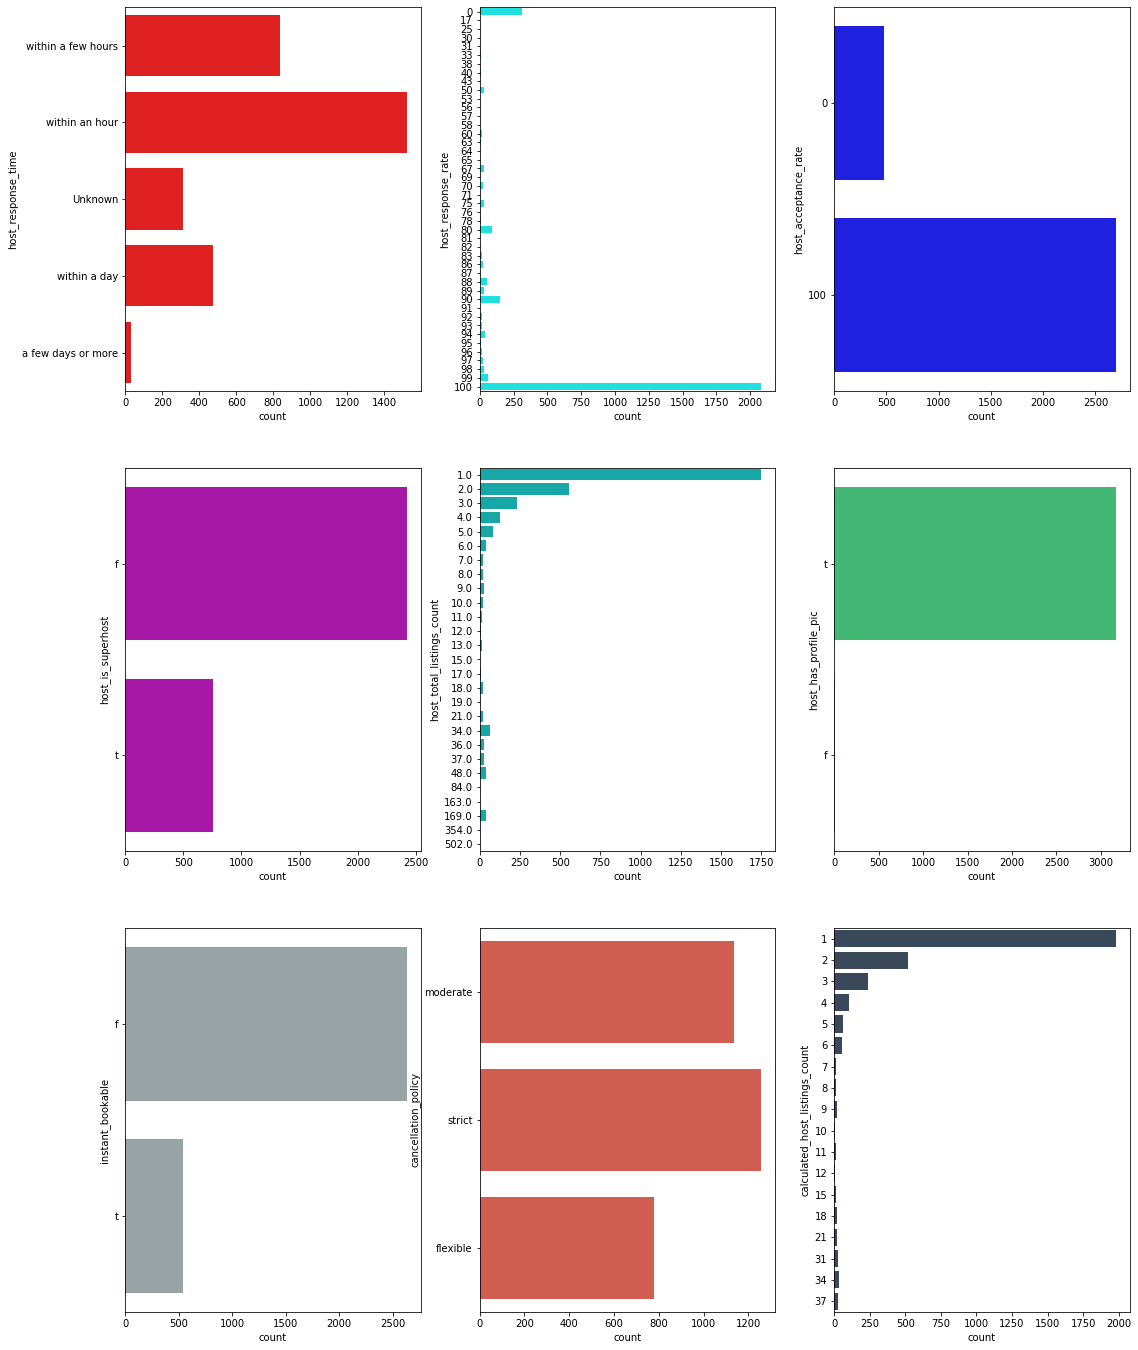

In [23]:
# Draw the countplot distributions of all host variables
countplot=listing_sel_df

f, axes = plt.subplots(3, 3, figsize=(18, 24))

sb.countplot(y="host_response_time", data=countplot, color = "r", orient='h', ax=axes[0,0])
sb.countplot(y="host_response_rate", data=countplot, color = "cyan", orient='h', ax=axes[0,1])
sb.countplot(y="host_acceptance_rate", data=countplot, color = "b", orient='h', ax=axes[0,2])
sb.countplot(y="host_is_superhost", data=countplot, color = "m", orient='h', ax=axes[1,0])
sb.countplot(y="host_total_listings_count", data=countplot, color = "c", orient='h', ax=axes[1,1])
sb.countplot(y="host_has_profile_pic", data=countplot, color = "#2ecc71", orient='h', ax=axes[1,2])
sb.countplot(y="instant_bookable", data=countplot, color = "#95a5a6", orient='h', ax=axes[2,0])
sb.countplot(y="cancellation_policy", data=countplot, color = "#e74c3c", orient='h', ax=axes[2,1])
sb.countplot(y="calculated_host_listings_count", data=countplot, color = "#34495e", orient='h', ax=axes[2,2])

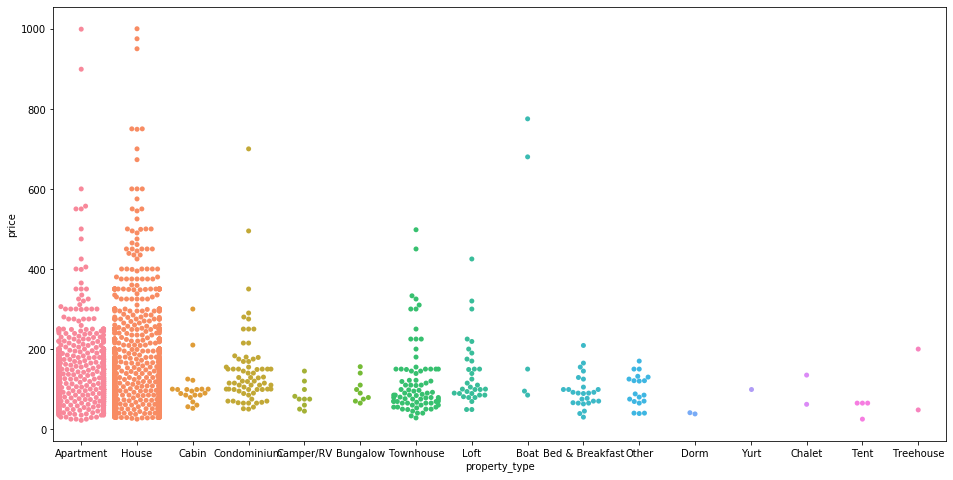

In [24]:
f, axes = plt.subplots(1, 1, figsize=(16, 8))
sb.swarmplot(x = 'property_type', y = 'price', data = listing_sel_df)

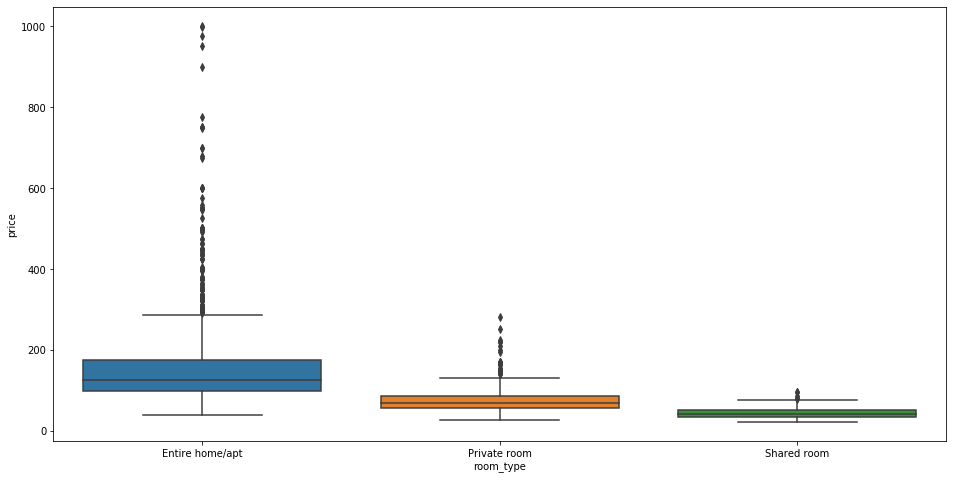

In [25]:
f, axes = plt.subplots(1, 1, figsize=(16, 8))
sb.boxplot(x = 'room_type', y = 'price', data = listing_sel_df)

Entire home/apartments are generally the most expensive, while shared room are usually the cheapest.

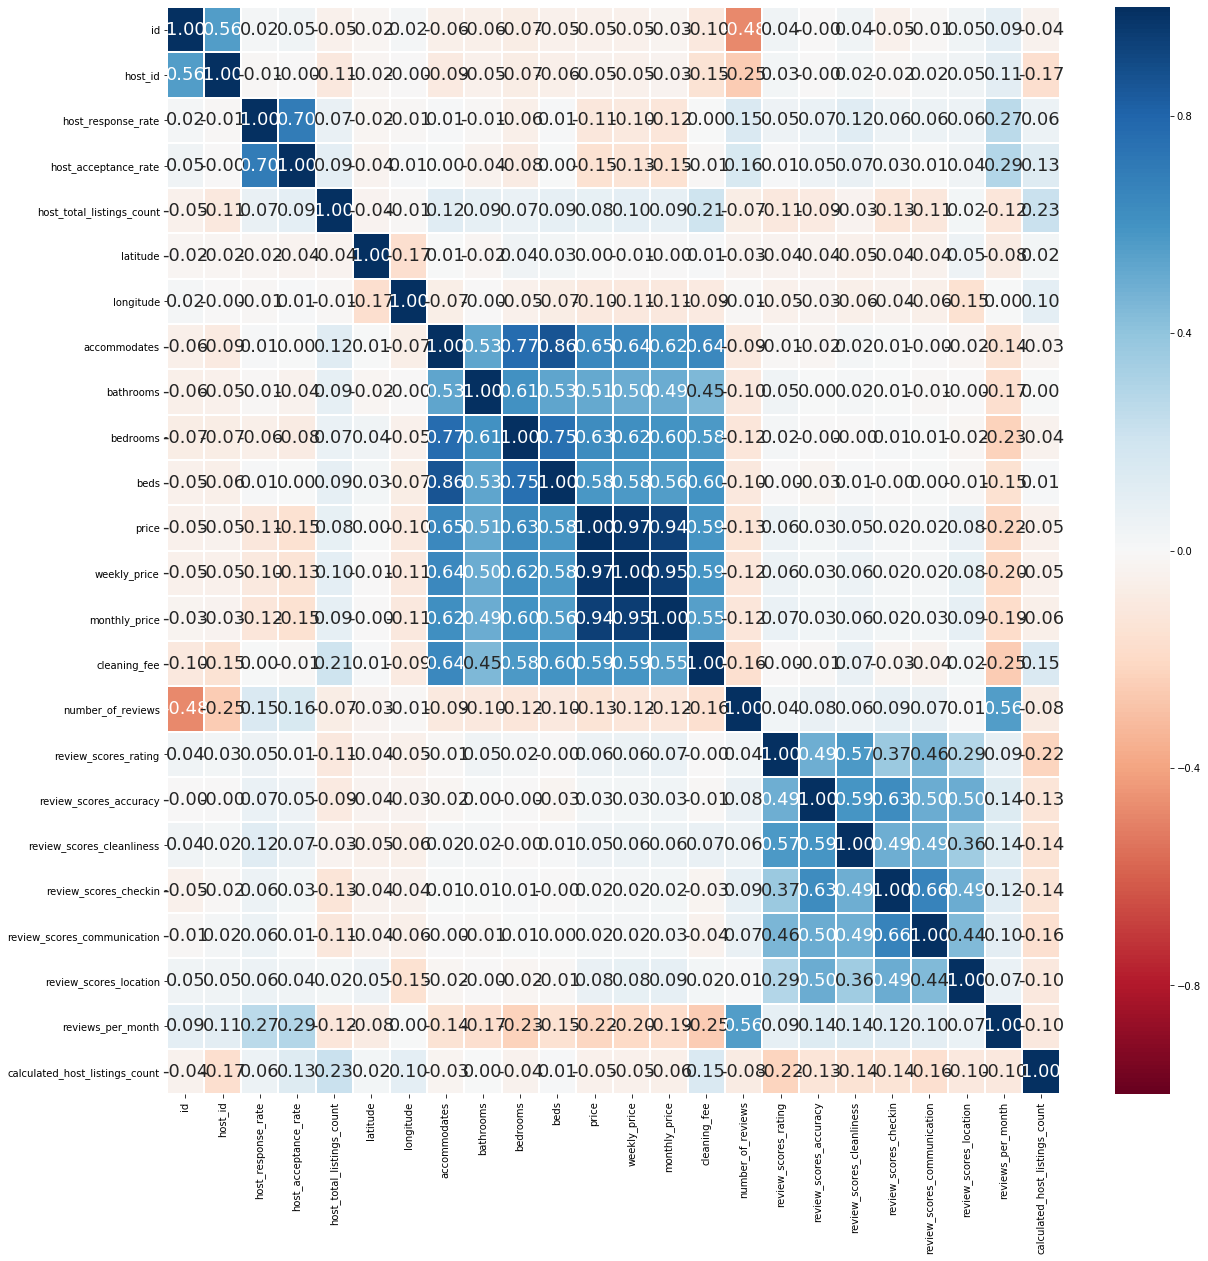

In [26]:
#print(listing_sel_df.corr())
f, axes = plt.subplots(1, 1, figsize=(20, 20))
sb.heatmap(listing_sel_df.corr(), vmin = -1, vmax = 1, linewidths = 1,
           annot = True, fmt = ".2f", annot_kws = {"size": 18}, cmap = "RdBu")

# Inference:
1. Price has strong positive correlation with accomodates, bathrooms, bedrooms and bed. This is expected since hosts usually charge more for more space and accomodation.
2. The review metrics has strong positive correlation with each other. 

### Comparing regular host and superhost

In [27]:
# Replacing T/F values with Superhost/Regular host
listing_sel_df['host_is_superhost'].replace('t','Super Host',inplace = True) 
listing_sel_df['host_is_superhost'].replace('f','Regular Host',inplace =True)

<Figure size 576x288 with 0 Axes>

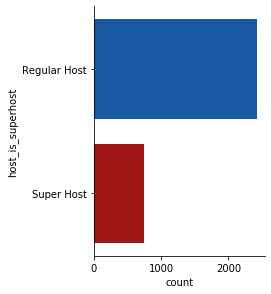

In [28]:
f, axes = plt.subplots(0, 0, figsize=(8, 4))
sb.catplot(y = 'host_is_superhost', data = listing_sel_df,palette=["#0059b8", "#b80000"],kind = "count", height = 4)

In [29]:
# Display value of host
listing_sel_df['host_is_superhost'].value_counts()

Regular Host    2420
Super Host       751
Name: host_is_superhost, dtype: int64

In [30]:
# Display percentage of Superhost
percent=(751/(2420+751))*100
print('Percentage of Superhost: ',percent)

Percentage of Superhost:  23.68338063702302


In [31]:
listing_sel_df.groupby('host_is_superhost').mean()

,id,host_id,host_response_rate,host_acceptance_rate,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,...,cleaning_fee,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,reviews_per_month,calculated_host_listings_count
host_is_superhost,,,,,,,,,,,,,,,,,,,,,
Regular Host,5.184454e+06,1.503266e+07,83.305372,82.272727,7.647934,47.628777,-122.332241,3.413636,1.265158,1.322701,...,46.795868,21.628926,93.652893,9.509091,9.430579,9.687190,9.742149,9.533058,1.816661,3.352893
Super Host,4.480577e+06,1.224094e+07,94.066578,93.475366,4.631158,47.628387,-122.334898,3.290280,1.239015,1.238349,...,44.945406,43.258322,97.395473,9.905459,9.885486,9.964048,9.974700,9.750999,2.969627,1.821571


In [32]:
listing_superhost = pd.DataFrame(data= listing_sel_df.groupby('host_is_superhost',axis =0).mean())

Text(0.5, 0, 'Total Listing')

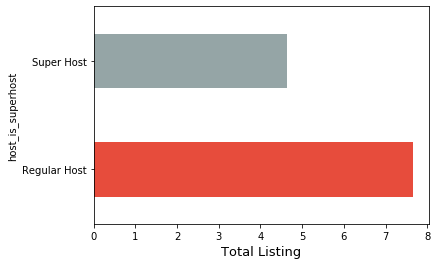

In [33]:
listing_superhost['host_total_listings_count'].plot(color=('#e74c3c','#95a5a6'),kind ='barh')
plt.xlabel("Total Listing", fontsize=13)

On average, regular hosts have more listings than superhosts.

In [34]:
listing_sel_df['host_is_superhost']

0       Regular Host
1         Super Host
2       Regular Host
4       Regular Host
5       Regular Host
6         Super Host
7         Super Host
8       Regular Host
9         Super Host
10        Super Host
11      Regular Host
12        Super Host
13      Regular Host
14      Regular Host
15      Regular Host
16      Regular Host
17        Super Host
19      Regular Host
20      Regular Host
21      Regular Host
22      Regular Host
24      Regular Host
25      Regular Host
27        Super Host
28      Regular Host
29      Regular Host
30        Super Host
31      Regular Host
32      Regular Host
33      Regular Host
            ...     
3782      Super Host
3783    Regular Host
3784      Super Host
3785    Regular Host
3786    Regular Host
3787    Regular Host
3788    Regular Host
3789    Regular Host
3790      Super Host
3791    Regular Host
3793      Super Host
3794    Regular Host
3795      Super Host
3796      Super Host
3797    Regular Host
3798    Regular Host
3799    Regul

In [35]:
listing_sel_df['host_is_superhost'].describe()

count             3171
unique               2
top       Regular Host
freq              2420
Name: host_is_superhost, dtype: object

Text(0.5, 0, 'Response rate differences')

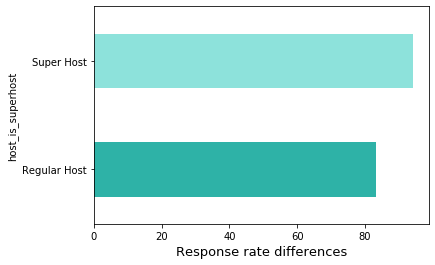

In [36]:
listing_superhost["host_response_rate"].plot(color=('#2eb2a7','#8de2db'),kind ='barh')
plt.xlabel("Response rate differences", fontsize=13)

Text(0.5, 0, 'Acceptance rate differences')

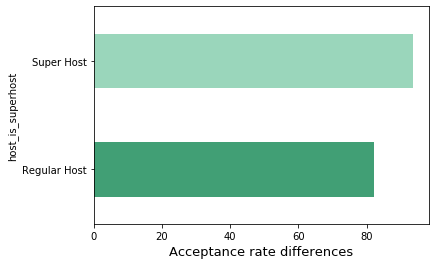

In [37]:
listing_superhost["host_acceptance_rate"].plot(color=('#419f75','#9ad6bb'),kind ='barh')
plt.xlabel("Acceptance rate differences", fontsize=13)

On average,that Super Host tend to have a higher response and acceptance rate as compared with Regular Host

Text(0.5, 0, 'price and cleaning_fee rate differences')

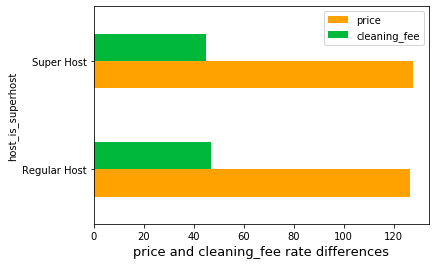

In [38]:
listing_superhost[['price', 'cleaning_fee']].plot(color=('#ffa200','#00b83a'),kind ='barh')
plt.xlabel("price and cleaning_fee rate differences", fontsize=13)

In [39]:
host_data = airbnb[[
"review_scores_rating",
"review_scores_accuracy",
"review_scores_cleanliness",
"review_scores_checkin",
"review_scores_communication",
"review_scores_location",
'host_response_time',
'host_response_rate', 
'host_is_superhost',
'cancellation_policy',
'instant_bookable', 
'host_acceptance_rate']]

host_data_df = pd.DataFrame(data=host_data)

# Replacing T/F values with Super host/Regular host
host_data_df['host_is_superhost'].replace('t','Super Host',inplace = True) 
host_data_df['host_is_superhost'].replace('f','Regular Host',inplace =True)


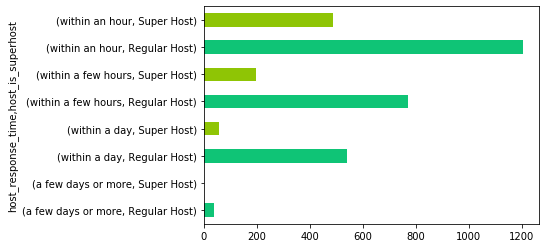

In [40]:
rs_df = pd.DataFrame(data = host_data_df.groupby(['host_response_time', 'host_is_superhost'],axis =0).count())
rs_df['host_response_rate'].plot(color=('#0fc476','#8fc505'),kind='barh')

Super Host replies to their guest within a day

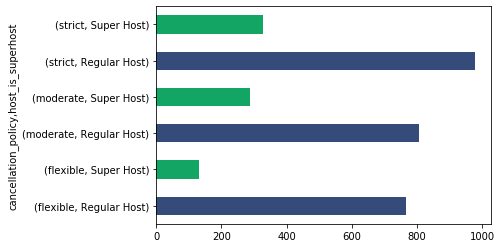

In [41]:
cp_df = pd.DataFrame(data = host_data_df.groupby(['cancellation_policy', 'host_is_superhost'],axis =0).count())
cp_df['host_response_rate'].plot(color=('#354c7a','#12A563'),kind='barh')

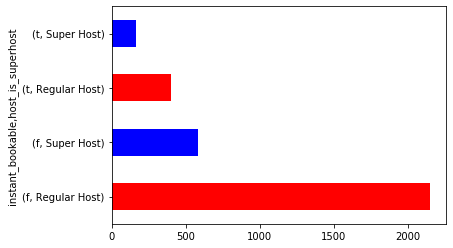

In [42]:
ib_df = pd.DataFrame(data = host_data_df.groupby(['instant_bookable', 'host_is_superhost'],axis =0).count())
ib_df['host_response_rate'].plot(color=('r','b'),kind='barh')

Text(0.5, 0, 'Response rate and Acceptance rate differences')

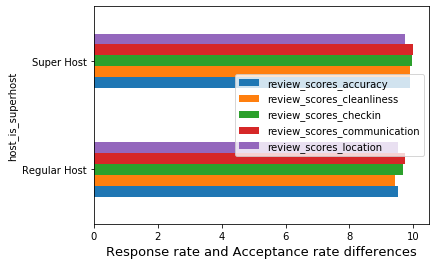

In [43]:
listing_superhost[[
"review_scores_accuracy",
"review_scores_cleanliness",
"review_scores_checkin",
"review_scores_communication",
"review_scores_location"]].plot(kind ='barh')
plt.xlabel("Response rate and Acceptance rate differences", fontsize=13)

Super Host tend to have higher review scores in terms of accuracy, cleanliness, checkin, communication and location

In [44]:
from sklearn.model_selection import train_test_split
listing_sel_df['instant_bookable'].replace('t','1',inplace = True) 
listing_sel_df['instant_bookable'].replace('f','0',inplace =True)
listing_sel_df['instant_bookable']=listing_sel_df['instant_bookable'].astype(float)

Y = listing_sel_df['host_is_superhost']
Y = Y.str.replace('Regular Host','0')
Y = Y.str.replace('Super Host','1')
Y = Y.astype('float64')
X = pd.DataFrame(listing_sel_df[[
"price",
"host_response_rate",
"host_acceptance_rate",
"host_total_listings_count",
"cleaning_fee",
"instant_bookable"
]])

X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.20,random_state=18)
# Check the sample sizes
print("Train Set :", y_train.shape, X_train.shape)
print("Test Set  :", y_test.shape, X_test.shape)

Train Set : (2536,) (2536, 6)
Test Set  : (635,) (635, 6)


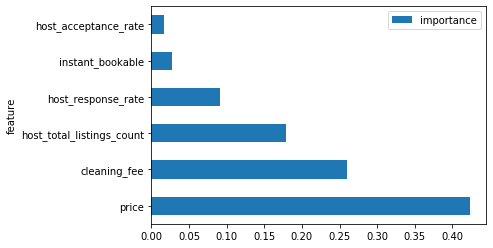

In [45]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0) 
regressor.fit(X_train,y_train)     

features = list(X_train.columns)
model = pd.DataFrame({'feature': features,
                   'importance': regressor.feature_importances_}).\
                    sort_values('importance', ascending = False)
model.head(10)
model.sort_values(by='importance',ascending=False)[:10].plot(x='feature', y='importance', kind='barh')

This shows that the most important features that contributes in becoming a Super Host. As being a superhost, the prices and fees tend to be higher and hence we can conclude that it is important for a host to have more total listing count

# Step 3b: Data exploration of calendar.csv

In [46]:
cal['price'] = cal['price'].apply(lambda x: str(x).replace('$',''))
cal['price'] = pd.to_numeric(cal['price'], errors = 'coerce')
cal_df = cal.groupby('date')[["price"]].sum()
cal_df['mean'] = cal.groupby('date')[["price"]].mean()
cal_df.columns = ['Total', 'Avg']
cal_df.head(10)

,Total,Avg
date,,
2016-01-04,211819.0,122.085879
2016-01-05,225312.0,120.681307
2016-01-06,220815.0,120.928258
2016-01-07,214823.0,120.958896
2016-01-08,227456.0,127.640853
2016-01-09,236326.0,127.330819
2016-01-10,241084.0,120.001991
2016-01-11,246497.0,118.565176
2016-01-12,249976.0,118.303833


In [47]:
listing_sel_df['price'].head()

0     85.0
1    150.0
2    975.0
4    450.0
5    120.0
Name: price, dtype: float64

In [48]:
#SET DATE AS INDEX
cal_df2 = cal.set_index('date')
cal_df2.index = pd.to_datetime(cal_df2.index)
cal_df2 = cal_df2[['price']].resample('M').mean()
cal_df2.head()

,price
date,
2016-01-31,121.256898
2016-02-29,123.947429
2016-03-31,127.963804
2016-04-30,134.400282
2016-05-31,138.832159


In [49]:
trace3 = go.Scatter(
    x = cal_df2.index[:-1],
    y = cal_df2.price[:-1]
)
layout3 = go.Layout(
    title = "Average Prices by Month",
    xaxis = dict(title = 'Month'),
    yaxis = dict(title = 'Price ($)')
)
data3 = [trace3]
figure3 = go.Figure(data = data3, layout = layout3)
offline.iplot(figure3)

### Inference: 
Prices peak between July and September, which is the vacation period for most countries.

# Step 4: Logistic Regression models

## 2 type of Logistic Regression models were created and compared
---

## Logistic Regression Version 1

### Response Variables : 
- host_is_superhost

### Predictor Variables :
- number_of_reviews   
- review_scores_rating
- review_scores_accuracy
- review_scores_cleanliness
- review_scores_checkin
- review_scores_communication
- review_scores_location 
- reviews_per_month


In [50]:
#Import libraries 
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,precision_score
from sklearn.model_selection import train_test_split
from sklearn.utils import class_weight
from sklearn.linear_model import LogisticRegression

In [51]:
listing_sel_df = listing_sel_df.reset_index()
listing_sel_df.head()

,index,id,neighborhood_overview,host_id,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,requires_license,reviews_per_month,instant_bookable,cancellation_policy,calculated_host_listings_count,extra_people
0,0,241032,Unknown,956883,2011-08-11,"Seattle, Washington, United States",within a few hours,96,100,Regular Host,...,10.0,10.0,10.0,9.0,f,4.07,0.0,moderate,2,$5.00
1,1,953595,"Queen Anne is a wonderful, truly functional vi...",5177328,2013-02-21,"Seattle, Washington, United States",within an hour,98,100,Super Host,...,10.0,10.0,10.0,10.0,f,1.48,0.0,strict,6,$0.00
2,2,3308979,Upper Queen Anne is a charming neighborhood fu...,16708587,2014-06-12,"Seattle, Washington, United States",within a few hours,67,100,Regular Host,...,10.0,10.0,10.0,10.0,f,1.15,0.0,strict,2,$25.00
3,4,278830,We are in the beautiful neighborhood of Queen ...,1452570,2011-11-29,"Seattle, Washington, United States",within an hour,100,0,Regular Host,...,9.0,10.0,10.0,9.0,f,0.89,0.0,strict,1,$15.00
4,5,5956968,This part of Queen Anne has wonderful views an...,326758,2010-12-25,"Seattle, Washington, United States",Unknown,0,0,Regular Host,...,10.0,10.0,10.0,10.0,f,2.45,0.0,strict,1,$30.00


In [52]:
Y = listing_sel_df['host_is_superhost']
Y = Y.str.replace('Regular Host','0')
Y = Y.str.replace('Super Host','1')
Y = Y.astype('int64')

X = pd.DataFrame(listing_sel_df[["number_of_reviews","review_scores_rating","review_scores_accuracy","review_scores_cleanliness","review_scores_checkin","review_scores_communication","review_scores_location","reviews_per_month"]])

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.20,random_state=1)

model = LogisticRegression(class_weight="balanced")

model.fit(X_train, y_train)

# Check the sample sizes
print("Train Set :", y_train.shape, X_train.shape)
print("Test Set  :", y_test.shape, X_test.shape)

#Check the weights
print("Weights :",class_weight.compute_class_weight('balanced',np.unique(y_train), y_train))

Train Set : (2536,) (2536, 8)
Test Set  : (635,) (635, 8)
Weights : [0.65428277 2.12040134]


//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.



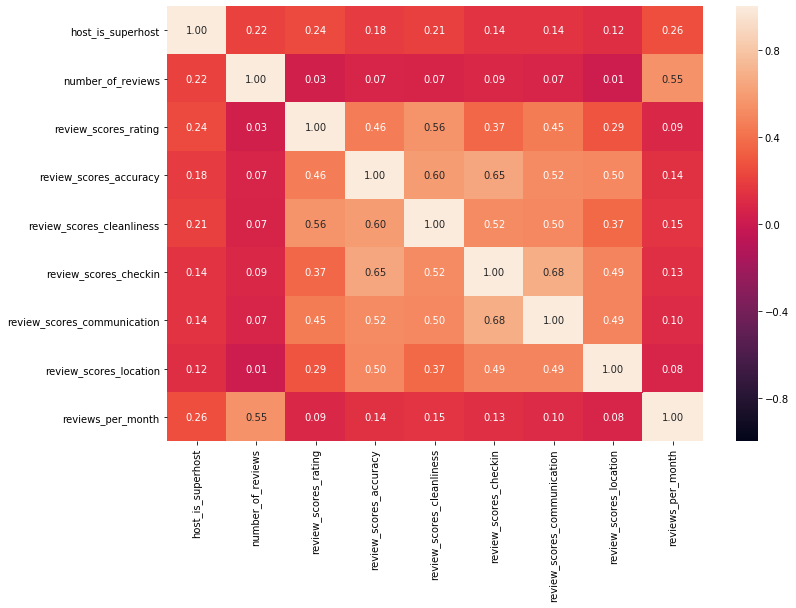

In [54]:
# Correlation between Response and the Predictors
trainDF = pd.concat([y_train, X_train.reindex(index=y_train.index)], sort = False, axis = 1)

f, axes = plt.subplots(1, 1, figsize=(12, 8))
sb.heatmap(trainDF.corr(), vmin = -1, vmax = 1, annot = True, fmt = ".2f")

In [55]:
# Predict the Total values from Predictors
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Print the Coefficients against Predictors
print('Intercept of Regression \t: b = ', model.intercept_)
print(pd.DataFrame(list(zip(X_train.columns, model.coef_[0])), columns = ["Predictors", "Coefficients"]))
print()

Intercept of Regression 	: b =  [-8.83263671]
                    Predictors  Coefficients
0            number_of_reviews      0.008434
1         review_scores_rating      0.081280
2       review_scores_accuracy      0.199779
3    review_scores_cleanliness      0.363144
4        review_scores_checkin      0.005966
5  review_scores_communication     -0.426016
6       review_scores_location     -0.109062
7            reviews_per_month      0.231348



In [56]:
# Import mean_squared_error from sklearn

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Accuracy Score:          \t:", round(accuracy_score(y_train,y_train_pred),4))
print("recall_score             \t:", round(recall_score(y_train,y_train_pred),4)) #True postive Rate
print("Precision Score          \t:", round(precision_score(y_train,y_train_pred),4))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Accuracy Score:          \t:", round(accuracy_score(y_test,y_test_pred),4)) 
print("recall_score             \t:", round(recall_score(y_test,y_test_pred),4)) # How
print("Precision Score          \t:", round(precision_score(y_test,y_test_pred),4))
print()

Goodness of Fit of Model 	Train Dataset
Accuracy Score:          	: 0.7259
recall_score             	: 0.7207
Precision Score          	: 0.4494

Goodness of Fit of Model 	Test Dataset
Accuracy Score:          	: 0.7134
recall_score             	: 0.7124
Precision Score          	: 0.4413



Confusion Matrix for train Set
Train Dataset
Precision: 	 0.4494
FPR :      	 0.2724
FNR :      	 0.2793
Test Dataset
Precision: 	 0.4413
FPR:       	 0.2863
FNR:       	 0.2876


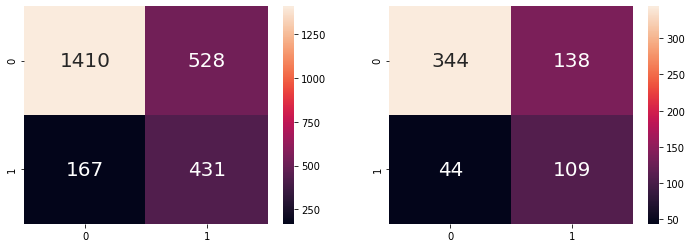

In [57]:
f, axes= plt.subplots(1, 2, figsize=(12,4))
sb.heatmap(confusion_matrix(y_train, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 20}, ax = axes[0])

sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 20}, ax = axes[1])


print("Confusion Matrix for train Set")
cf_train = confusion_matrix(y_train, y_train_pred)
TP_train = cf_train[1,1]
FN_train = cf_train[1,0] 
FP_train = cf_train[0,1]
TN_train = cf_train[0,0]
FPR_train = (FP_train/(FP_train + TN_train))
FNR_train = (FN_train/(TP_train + FN_train))
Precision = (TP_train/(TP_train + FP_train))

print("Train Dataset")
print("Precision: \t",round(Precision,4))
print("FPR :      \t", round(FPR_train,4))
print("FNR :      \t", round(FNR_train,4))


cf_test = confusion_matrix(y_test, y_test_pred)

TP_test = cf_test[1,1]
FN_test = cf_test[1,0]
FP_test = cf_test[0,1]
TN_test = cf_test[0,0]

FPR_test = (FP_test/(FP_test + TN_test))
FNR_test = (FN_test/(TP_test + FN_test))
Precision = (TP_test/(TP_test + FP_test))

print("Test Dataset")
print("Precision: \t",round(Precision,4))
print("FPR:       \t", round(FPR_test,4))
print("FNR:       \t", round(FNR_test,4))

## Conclusion of Logistic Regression Version 1

### Observation
Correlation between Response and Predictor variables are not strong indiviually. However, when each predictor variables are concatenated together to preform multi virate logistic regression, the accuracy score of the model is favourable.

Accuracy of the model 
- Train data : 72.75%
- Test data  : 72.13%

However, Accuracy does not show the distrubution of the classifcation. We need to check the False postive Rate and Negative Rate of the train and test Dataset respecitvely .

False Postive rate: 
- Train data : 27.04%
- Test data  : 28.01%


False Negative Rate:
- Train data : 27.93%
- Test data  : 27.45%


The difference between the Accuracy,False Postive Rate and Flase Negative rate is relatively small. It means the model is generalized and is not overfitting or underfitting


---
## Logistic Regression Version 2

### Response Variables : 
- host_is_superhost

### Predictor Variables :
- host_response_time
- host_response_rate
- host_acceptance_rate
- number_of_reviews   
- review_scores_rating
- review_scores_accuracy
- review_scores_cleanliness
- review_scores_checkin
- review_scores_communication
- review_scores_location 
- reviews_per_month


In [58]:
X = pd.DataFrame(listing_sel_df[["host_response_time","host_response_rate","host_acceptance_rate","number_of_reviews","review_scores_rating","review_scores_accuracy","review_scores_cleanliness","review_scores_checkin","review_scores_communication","review_scores_location","reviews_per_month","cancellation_policy"]])
X['host_response_time']=X['host_response_time'].astype('category').cat.codes
X['cancellation_policy']=X['cancellation_policy'].astype('category').cat.codes
X

,host_response_time,host_response_rate,host_acceptance_rate,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,reviews_per_month,cancellation_policy
0,3,96,100,207,95.0,10.0,10.0,10.0,10.0,9.0,4.07,1
1,4,98,100,43,96.0,10.0,10.0,10.0,10.0,10.0,1.48,2
2,3,67,100,20,97.0,10.0,10.0,10.0,10.0,10.0,1.15,2
3,4,100,0,38,92.0,9.0,9.0,10.0,10.0,9.0,0.89,2
4,0,0,0,17,95.0,10.0,10.0,10.0,10.0,10.0,2.45,2
5,4,100,100,58,99.0,10.0,10.0,10.0,10.0,10.0,2.46,1
6,4,100,100,173,97.0,10.0,10.0,10.0,10.0,9.0,4.73,2
7,0,0,100,8,97.0,10.0,9.0,10.0,9.0,10.0,1.22,2
8,4,98,100,32,97.0,10.0,10.0,10.0,10.0,10.0,1.55,2
9,3,100,100,181,97.0,10.0,10.0,10.0,10.0,10.0,3.33,1


In [59]:
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.20, random_state=1)

from sklearn.linear_model import LogisticRegression

model = LogisticRegression(class_weight="balanced")

model.fit(X_train, y_train)

# Check the sample sizes
print("Train Set :", y_train.shape, X_train.shape)
print("Test Set  :", y_test.shape, X_test.shape)

#Check the weights
print("Weights :",class_weight.compute_class_weight('balanced',np.unique(y_train), y_train))

Train Set : (2536,) (2536, 12)
Test Set  : (635,) (635, 12)
Weights : [0.65428277 2.12040134]


//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.



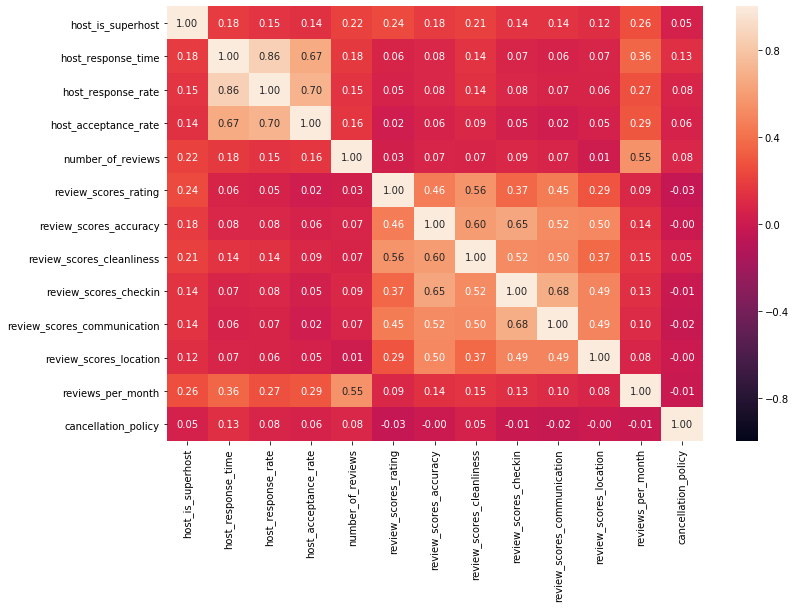

In [60]:
# Correlation between Response and the Predictors
trainDF = pd.concat([y_train, X_train.reindex(index=y_train.index)], sort = False, axis = 1)

f, axes = plt.subplots(1, 1, figsize=(12, 8))
sb.heatmap(trainDF.corr(), vmin = -1, vmax = 1, annot = True, fmt = ".2f")

In [61]:
# Predict the Total values from Predictors
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Print the Coefficients against Predictors
print('Intercept of Regression \t: b = ', model.intercept_)
print(pd.DataFrame(list(zip(X_train.columns, model.coef_[0])), columns = ["Predictors", "Coefficients"]))
print()

Intercept of Regression 	: b =  [-9.21318884]
                     Predictors  Coefficients
0            host_response_time      0.182647
1            host_response_rate      0.000502
2          host_acceptance_rate      0.001333
3             number_of_reviews      0.008229
4          review_scores_rating      0.082536
5        review_scores_accuracy      0.218351
6     review_scores_cleanliness      0.317999
7         review_scores_checkin      0.009392
8   review_scores_communication     -0.431180
9        review_scores_location     -0.137906
10            reviews_per_month      0.191450
11          cancellation_policy      0.140717



In [62]:
# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Accuracy Score:          \t:", round(accuracy_score(y_train,y_train_pred),4))
print("recall_score             \t:", round(recall_score(y_train,y_train_pred),4)) #True postive Rate
print("Precision Score          \t:", round(precision_score(y_train,y_train_pred),4))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Accuracy Score:          \t:", round(accuracy_score(y_test,y_test_pred),4)) 
print("recall_score             \t:", round(recall_score(y_test,y_test_pred),4)) # How
print("Precision Score          \t:", round(precision_score(y_test,y_test_pred),4))
print()

Goodness of Fit of Model 	Train Dataset
Accuracy Score:          	: 0.7098
recall_score             	: 0.7642
Precision Score          	: 0.4344

Goodness of Fit of Model 	Test Dataset
Accuracy Score:          	: 0.7071
recall_score             	: 0.8039
Precision Score          	: 0.4409



Confusion Matrix for train Set
Train Dataset
Precision: 	 0.4344
FPR :      	 0.307
FNR :      	 0.2358
Confusion Matrix for test Set
Test Dataset
Precision: 	 0.4409
FPR:       	 0.3237
FNR:       	 0.1961


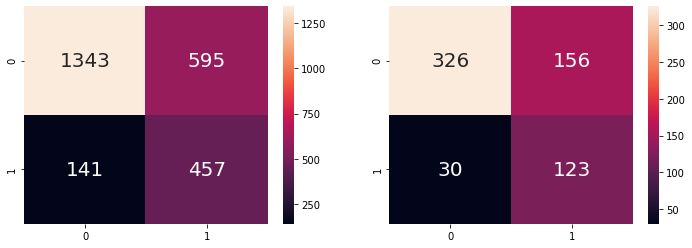

In [63]:
f, axes= plt.subplots(1, 2, figsize=(12,4))
sb.heatmap(confusion_matrix(y_train, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 20}, ax = axes[0])

sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 20}, ax = axes[1])


print("Confusion Matrix for train Set")
cf_train = confusion_matrix(y_train, y_train_pred)

TP_train = cf_train[1,1]
FN_train = cf_train[1,0] 
FP_train = cf_train[0,1]
TN_train = cf_train[0,0]
FPR_train = (FP_train/(FP_train + TN_train))
FNR_train = (FN_train/(TP_train + FN_train))
Precision = (TP_train/(TP_train + FP_train))

print("Train Dataset")
print("Precision: \t",round(Precision,4))
print("FPR :      \t", round(FPR_train,4))
print("FNR :      \t", round(FNR_train,4)) 

print("Confusion Matrix for test Set")

cf_test = confusion_matrix(y_test, y_test_pred)
TP_test = cf_test[1,1]
FN_test = cf_test[1,0]
FP_test = cf_test[0,1]
TN_test = cf_test[0,0]

FPR_test = (FP_test/(FP_test + TN_test))
FNR_test = (FN_test/(TP_test + FN_test))
Precision = (TP_test/(TP_test + FP_test))

print("Test Dataset")
print("Precision: \t",round(Precision,4))
print("FPR:       \t", round(FPR_test,4))
print("FNR:       \t", round(FNR_test,4))

## Conclusion of Logistic Regression Version 2

### Observation
Correlation between Response and Predictor variables are not strong indiviually. However, when each predictor variables are concatenated together to preform multi virate logistic regression, the accuracy score of the model is favourable.

Accuracy of the model:
- Train data : 68.65%
- Test data  : 67.09%


However, Accuracy does not show the distrubution of the classifcation. We need to check the False postive Rate and Negative Rate of the train and test Dataset respecitvely .


False Postive rate: 
- Train data : 32.35%
- Test data  : 36.31%


False Negative Rate:
- Train data : 28.09%
- Test data  : 22.22%

The difference between the Accuracy,False Postive Rate and Flase Negative rate is relatively small. It means the model is generalized and is not overfitting or underfitting

---
## Conclusion of Logistic Regression models 

Logstic Regression Version 1 has better accuracy and lower false postive and negative rate. However, we want to explore if Random Forest Classifier will be a better model than logistic regression


---

# Step 6: Random Forest Classifier



In [64]:
from sklearn.ensemble import RandomForestClassifier
regressor = RandomForestClassifier(n_estimators = 100, random_state = 2, class_weight="balanced")# n_estimators is the number of trees 
regressor.fit(X_train,y_train)           

RandomForestClassifier(bootstrap=True, class_weight='balanced',
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=None, oob_score=False,
                       random_state=2, verbose=0, warm_start=False)

In [65]:
# Predict on the train and test set.
y_train_pred = regressor.predict(X_train)
y_test_pred = regressor.predict(X_test)


# Print the Classification Accuracy
print("Classification Accuracy \t:", round(regressor.score(X_train, y_train),4))
print()

# Print the Classification Accuracy
print("Classification Accuracy \t:", round(regressor.score(X_test, y_test),4))
print()

print("On the train Dataset ")
print("recall_score             \t:", round(recall_score(y_train,y_train_pred),4)) #True postive Rate
print("Precision Score          \t:", round(precision_score(y_train,y_train_pred),4))
print()
print("On the test Dataset ")
print("recall_score             \t:", round(recall_score(y_test,y_test_pred),4)) # How
print("Precision Score          \t:", round(precision_score(y_test,y_test_pred),4))
print()


rf_probs = regressor.predict_proba(X_train)[:, 1]

Classification Accuracy 	: 0.9984

Classification Accuracy 	: 0.8472

On the train Dataset 
recall_score             	: 0.9983
Precision Score          	: 0.995

On the test Dataset 
recall_score             	: 0.6078
Precision Score          	: 0.7154



In [66]:
n_nodes = []
max_depths = []

for ind_tree in regressor.estimators_:
    n_nodes.append(ind_tree.tree_.node_count)
    max_depths.append(ind_tree.tree_.max_depth)
    
print(f'Average number of nodes {int(np.mean(n_nodes))}')
print(f'Average maximum depth {int(np.mean(max_depths))}')
print(rf_probs)

Average number of nodes 897
Average maximum depth 23
[0.9  0.02 0.01 ... 0.07 0.06 0.05]


In [67]:
y_train_pred = regressor.predict(X_train)
train_rf_probs = regressor.predict_proba(X_train)[:, 1]

y_test_pred = regressor.predict(X_test)
rf_probs = regressor.predict_proba(X_test)[:, 1]

Train Dataset
FPR : 0.0015
FNR : 0.0017

Test Dataset
FPR : 0.0768
FNR : 0.3922


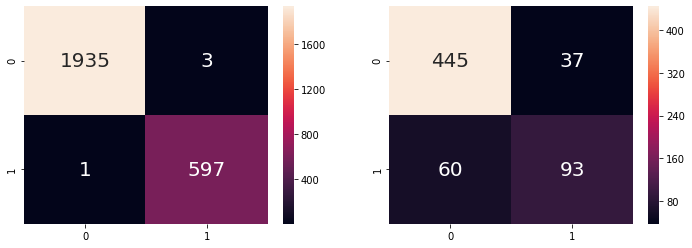

In [68]:
f, axes= plt.subplots(1, 2, figsize=(12,4))
sb.heatmap(confusion_matrix(y_train, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 20}, ax = axes[0])

sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 20}, ax = axes[1])


cf_train = confusion_matrix(y_train, y_train_pred)
TP_train = cf_train[1,1]
FN_train = cf_train[1,0] 
FP_train = cf_train[0,1]
TN_train = cf_train[0,0]
FPR_train = (FP_train/(FP_train + TN_train))
FNR_train = (FN_train/(TP_train + FN_train))
print("Train Dataset")
print("FPR :", round(FPR_train,4)) 
print("FNR :", round(FNR_train,4))
print()


cf_test = confusion_matrix(y_test, y_test_pred)
TP_test = cf_test[1,1]
FN_test = cf_test[1,0] 
FP_test = cf_test[0,1]
TN_test = cf_test[0,0]
FPR_test = (FP_test/(FP_test + TN_test))
FNR_test = (FN_test/(TP_test + FN_test))
print("Test Dataset")
print("FPR :", round(FPR_test,4)) 
print("FNR :", round(FNR_test,4))

In [69]:
features = list(X_train.columns)
fi_model = pd.DataFrame({'feature': features,
                   'importance': regressor.feature_importances_}).\
                    sort_values('importance', ascending = False)
fi_model.head(10)

,feature,importance
3,number_of_reviews,0.248209
10,reviews_per_month,0.233405
4,review_scores_rating,0.207730
1,host_response_rate,0.054408
0,host_response_time,0.050695
11,cancellation_policy,0.047065
6,review_scores_cleanliness,0.043991
5,review_scores_accuracy,0.034315
9,review_scores_location,0.029589
8,review_scores_communication,0.019759


## Conclusion of Random Forest Classifier 

The results are definintely more favourable than logistic Regression. 

Accuracy of the model:
- Train data: 99.13%
- Test data: 82.68%

However, Accuracy does not show the distrubution of the classifcation. We need to check the False postive Rate and Negative Rate of the train and test Dataset respecitvely .

False Postive rate:
- Train data: 0.47%
- Test data: 0.08%

False Negative Rate: 0.0215 and 0.4621
- Train data: 2.15%
- Test data: 46.21%

Results shows that the Accuracy and false Negative Rate is much higher than that of Test data. This means that the model is overfitting on the train data.

Further more, the number of nodes created is 879 and average depth per tree is 23. This is not an optimized model as the model is purposely finding nodes to fit the train data. Hyperparamemter needs to change to a more generalized model.

## Random Forest Classifier Optimization through Random Search CV

We use the libaray RandomizedSearchCV to help us run cross validation over a set of many different hyperparamter to find the best optimized solution.

In [70]:
from sklearn.model_selection import RandomizedSearchCV

# Hyperparameter grid

param_grid = {
    'n_estimators': np.linspace(10, 300).astype(int), #10 to 200 decision tree
    'max_depth': list(np.linspace(3, 20).astype(int)), # 3 to 20 max depth 
    'max_features': ['auto', 'sqrt','log2', None] + list(np.arange(0.5, 1, 0.1)),
    'max_leaf_nodes': list(np.linspace(10, 50, 500).astype(int)), # 10 to 50 (irterate 500 numbers )
    'min_samples_split': [2, 5, 10],
    'bootstrap': [True, False],    
}

# Estimator for use in random search
estimator = RandomForestClassifier(class_weight="balanced")

# Create the random search model
rs = RandomizedSearchCV(estimator, param_grid, n_jobs = -1, 
                        scoring = 'roc_auc', cv = 3, 
                        n_iter = 10, verbose = 1, random_state=0)

# Fit 
rs.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    5.7s finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight='balanced',
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators='warn',
                                                    n_job

In [71]:
# Check the sample sizes
print("Train Set :", y_train.shape, X_train.shape)
print("Test Set  :", y_test.shape, X_test.shape)

Train Set : (2536,) (2536, 12)
Test Set  : (635,) (635, 12)


In [72]:
rs.best_params_
best_model = rs.best_estimator_

In [73]:
y_train_pred = best_model.predict(X_train)
train_rf_probs = best_model.predict_proba(X_train)[:, 1]

y_test_pred = best_model.predict(X_test)
rf_probs = best_model.predict_proba(X_test)[:, 1]

In [74]:
n_nodes = []
max_depths = []

for ind_tree in best_model.estimators_:
    n_nodes.append(ind_tree.tree_.node_count)
    max_depths.append(ind_tree.tree_.max_depth)
    
print(f'Average number of nodes {int(np.mean(n_nodes))}')
print(f'Average maximum depth {int(np.mean(max_depths))}')

Average number of nodes 61
Average maximum depth 9


In [75]:
# Print the Classification Accuracy
print("Classification Accuracy \t:", round(best_model.score(X_train, y_train),4))
print()

# Print the Classification Accuracy
print("Classification Accuracy \t:", round(best_model.score(X_test, y_test),4))
print()


print("On the train Dataset ")
print("recall_score             \t:", round(recall_score(y_train,y_train_pred),4)) #True postive Rate
print("Precision Score          \t:", round(precision_score(y_train,y_train_pred),4))
print()
print("On the test Dataset ")
print("recall_score             \t:", round(recall_score(y_test,y_test_pred),4)) # How
print("Precision Score          \t:", round(precision_score(y_test,y_test_pred),4))
print()

Classification Accuracy 	: 0.8423

Classification Accuracy 	: 0.8236

On the train Dataset 
recall_score             	: 0.796
Precision Score          	: 0.6313

On the test Dataset 
recall_score             	: 0.7386
Precision Score          	: 0.6108



Train Dataset
FPR : 0.1434
FNR : 0.204

Test Dataset
FPR : 0.1494
FNR : 0.2614


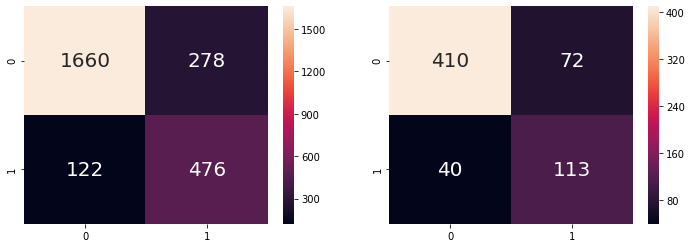

In [76]:
from sklearn.metrics import confusion_matrix
f, axes= plt.subplots(1, 2, figsize=(12,4))
sb.heatmap(confusion_matrix(y_train, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 20}, ax = axes[0])

sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 20}, ax = axes[1])

cf_train = confusion_matrix(y_train, y_train_pred)
TP_train = cf_train[1,1]
FN_train = cf_train[1,0] 
FP_train = cf_train[0,1]
TN_train = cf_train[0,0]
FPR_train = (FP_train/(FP_train + TN_train))
FNR_train = (FN_train/(TP_train + FN_train))
print("Train Dataset")
print("FPR :", round(FPR_train,4)) 
print("FNR :", round(FNR_train,4))
print()


cf_test = confusion_matrix(y_test, y_test_pred)
TP_test = cf_test[1,1]
FN_test = cf_test[1,0] 
FP_test = cf_test[0,1]
TN_test = cf_test[0,0]
FPR_test = (FP_test/(FP_test + TN_test))
FNR_test = (FN_test/(TP_test + FN_test))
print("Test Dataset")
print("FPR :", round(FPR_test,4)) 
print("FNR :", round(FNR_test,4))

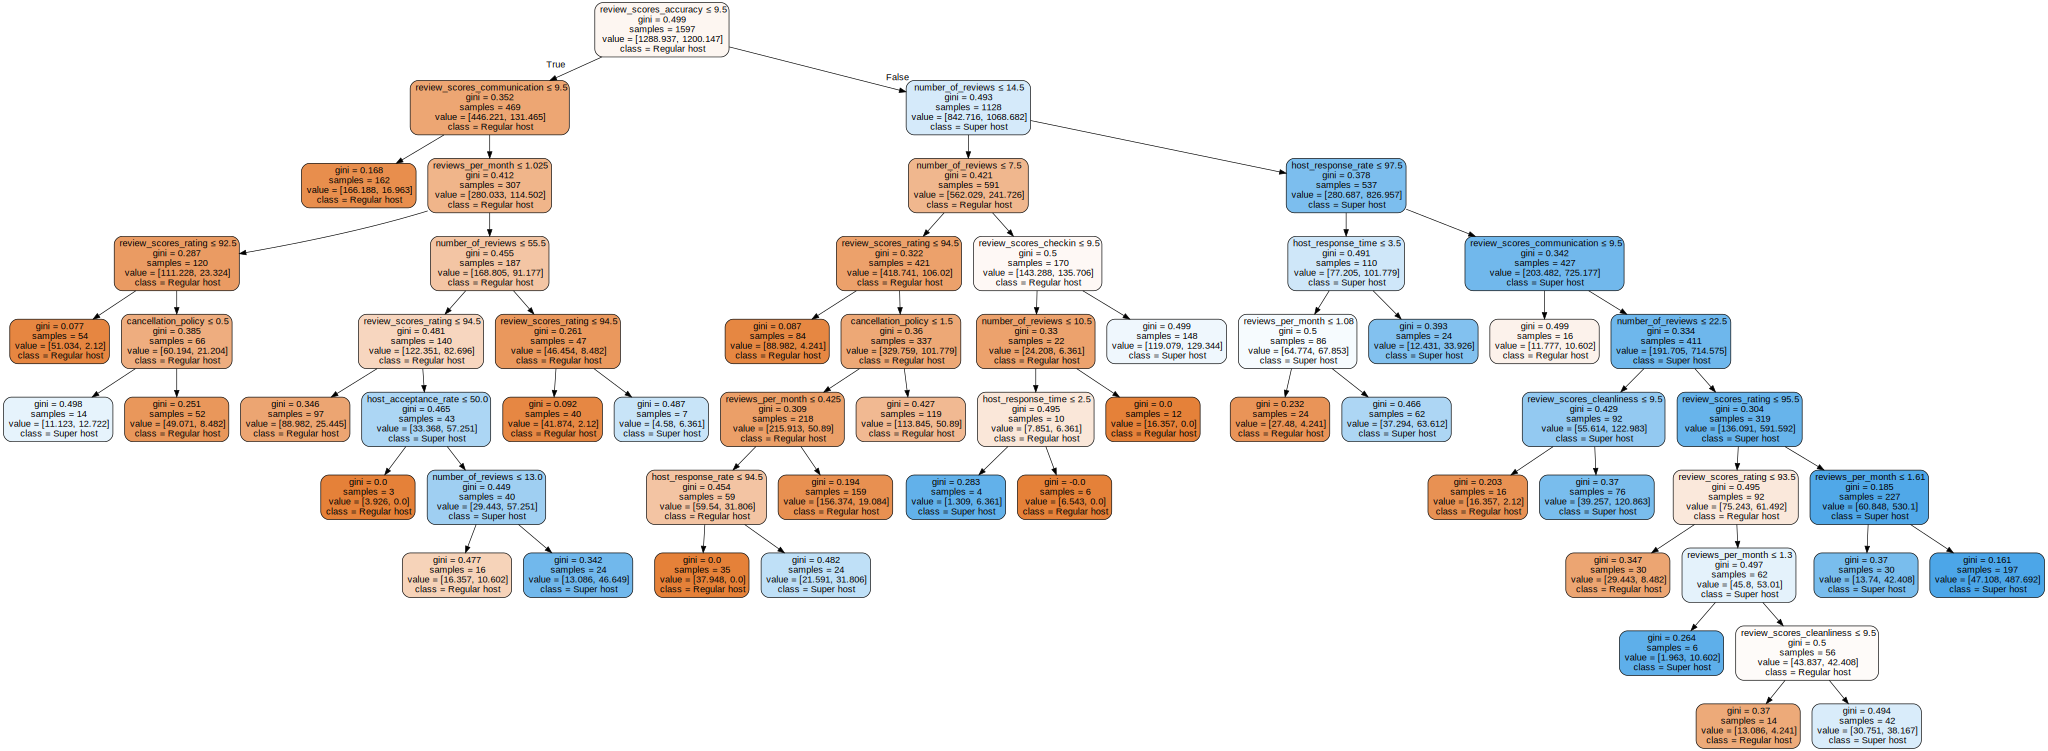

In [77]:
estimator = best_model.estimators_[0]


# Import export_graphviz from sklearn.tree
from sklearn.tree import export_graphviz

# Export the Decision Tree as a dot object
treedot3 = export_graphviz(estimator,# the model
                          feature_names = X_train.columns,              # the features 
                          out_file = None,
                          class_names = ['Regular host','Super host'], # output file
                          filled = True,                                # node colors
                          rounded = True,                               # make pretty
                          special_characters = True)                    # postscript

# Render using graphviz
import graphviz
graphviz.Source(treedot3)






In [78]:
features = list(X_train.columns)
fi_model = pd.DataFrame({'feature': features,
                   'importance': estimator.feature_importances_}).\
                    sort_values('importance', ascending = False)
fi_model.head(10)

,feature,importance
3,number_of_reviews,0.444082
5,review_scores_accuracy,0.185817
4,review_scores_rating,0.153235
10,reviews_per_month,0.056373
1,host_response_rate,0.055752
6,review_scores_cleanliness,0.030902
8,review_scores_communication,0.026856
0,host_response_time,0.015605
11,cancellation_policy,0.015002
7,review_scores_checkin,0.010134


## Conclusion of Random Forest Classifier with RandomSearchCV

The Random Forest Classifier with RandomSearch CV is the most optimized model to predict superhost and regularhost


Accuracy of the model
- Train data: 84.19%
- Test data: 81.57%

However, Accuracy does not show the distrubution of the classifcation. We need to check the False postive Rate and Negative Rate of the train and test Dataset respecitvely .

False Postive rate:
- Train data: 14.81%
- Test data: 16.18%

False Negative Rate: 
- Train data: 19.06%
- Test data: 25.49%

A sigicant improvement in terms of Accuracy, False Postive rate and False Negative rate for both train and test. The difference result by the model of each data set is relatively small. Thus the model is generalize and not overfitting or underfitting.

The average node is 93 and average depth is 11. 

Listing out the feature by rank of importance, reviews_scores_rating is at the top. reviews_score_rating is the sum of all the review ratings of differente category combine. Therefore, we want to dive deeper into the reviews section as it the most important feature.


# Step 7: Sentiment analysis using VADER 

VADER produces four sentiment metrics from these word ratings. The first three - positive, neutral and negative - represent the proportion of the text that falls into those categories. (...). The final metric, the compound score, is the sum of all of the lexicon ratings which have been standardized to range between -1 and 1.

In [79]:
rev=pd.read_csv('reviews.csv')
rev.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


## Preparing the Textual Data

### Language Detection

In [80]:
from langdetect import detect

# write the function that detects the language
def language_detection(text):
    try:
        return detect(text)
    except:
        return None
    
#%%time
rev['language'] = rev['comments'].apply(language_detection)
# write the dataframe to a csv file in order to avoid the long runtime
rev.to_csv('processed_df', index=False)
lang = pd.read_csv('processed_df')

In [81]:
rev.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments,language
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...,en
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...,en
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb...",en
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...,en
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...,en


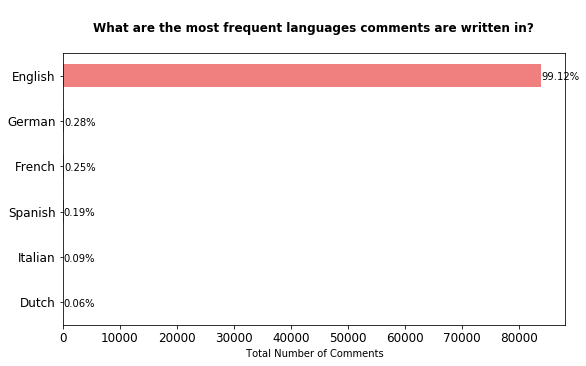

In [82]:
# visualizing the comments' languages b) neat and clean
ax = rev.language.value_counts().head(6).plot(kind='barh', figsize=(9,5), color="lightcoral", 
                                             fontsize=12);

ax.set_title("\nWhat are the most frequent languages comments are written in?\n", 
             fontsize=12, fontweight='bold')
ax.set_xlabel(" Total Number of Comments", fontsize=10)
ax.set_yticklabels(['English', 'German', 'French', 'Spanish', 'Italian', 'Dutch'])

# create a list to collect the plt.patches data
totals = []
# find the ind. values and append to list
for i in ax.patches:
    totals.append(i.get_width())
# get total
total = sum(totals)

# set individual bar labels using above list
for i in ax.patches:
    ax.text(x=i.get_width(), y=i.get_y()+.35, 
            s=str(round((i.get_width()/total)*100, 2))+'%', 
            fontsize=10, color='black')

# invert for largest on top 
ax.invert_yaxis()

In [83]:
df_eng = rev[(rev['language']=='en')]

In [84]:
rev=df_eng
rev.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments,language
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...,en
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...,en
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb...",en
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...,en
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...,en


In [85]:
rev.shape

(83784, 7)

In [86]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyser = SentimentIntensityAnalyzer()

In [87]:
rev['comments'].fillna('', inplace=True)

In [88]:
def negative_score(text):
    negative_value = analyser.polarity_scores(text)['neg']
    return negative_value

# getting only the neutral score
def neutral_score(text):
    neutral_value = analyser.polarity_scores(text)['neu']
    return neutral_value

# getting only the positive score
def positive_score(text):
    positive_value = analyser.polarity_scores(text)['pos']
    return positive_value

# getting only the compound score
def compound_score(text):
    compound_value = analyser.polarity_scores(text)['compound']
    return compound_value

In [89]:
rev['negative'] = rev['comments'].apply(negative_score)
rev['neutral'] = rev['comments'].apply(neutral_score)
rev['positive'] = rev['comments'].apply(positive_score)
rev['compound'] = rev['comments'].apply(compound_score)

In [92]:
rev.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments,language,negative,neutral,positive,compound
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...,en,0.000,0.462,0.538,0.7901
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...,en,0.000,0.640,0.360,0.9875
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb...",en,0.038,0.799,0.164,0.8718
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...,en,0.035,0.769,0.196,0.8313
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...,en,0.000,0.681,0.319,0.9783


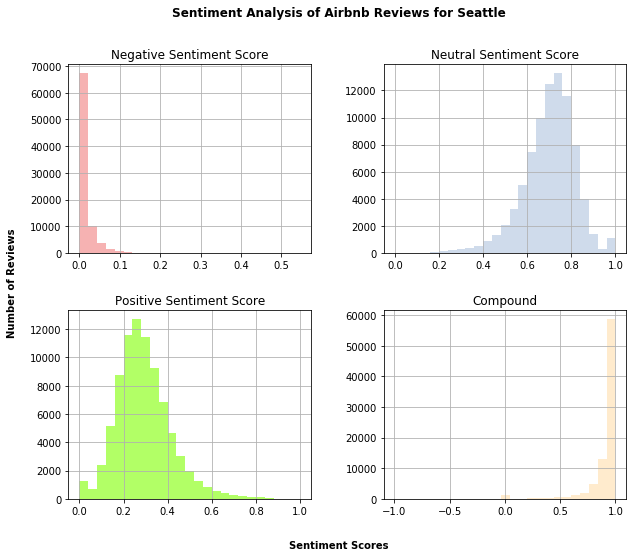

In [93]:
# all scores in 4 histograms
fig, axes = plt.subplots(2, 2, figsize=(10,8))

# plot all 3 histograms
rev.hist('negative', bins=25, ax=axes[0,0], color='lightcoral', alpha=0.6)
axes[0,0].set_title('Negative Sentiment Score')
rev.hist('neutral', bins=25, ax=axes[0,1], color='lightsteelblue', alpha=0.6)
axes[0,1].set_title('Neutral Sentiment Score')
rev.hist('positive', bins=25, ax=axes[1,0], color='chartreuse', alpha=0.6)
axes[1,0].set_title('Positive Sentiment Score')
rev.hist('compound', bins=25, ax=axes[1,1], color='navajowhite', alpha=0.6)
axes[1,1].set_title('Compound')


# plot common x- and y-label
fig.text(0.5, 0.04, 'Sentiment Scores',  fontweight='bold', ha='center')
fig.text(0.04, 0.5, 'Number of Reviews', fontweight='bold', va='center', rotation='vertical')

# plot title
plt.suptitle('Sentiment Analysis of Airbnb Reviews for Seattle\n\n', fontsize=12, fontweight='bold');

### Inference:
1. In general, there are more negative sentiments than positive sentiments.
2. The positive sentiments are more intense than the negative sentiments.

In [94]:
percentiles = rev['compound'].describe(percentiles=[.05, .1, .2, .3, .4, .5, .6, .7, .8, .9])
percentiles

count    83784.000000
mean         0.899579
std          0.184688
min         -0.995600
5%           0.624900
10%          0.790600
20%          0.883000
30%          0.920000
40%          0.941200
50%          0.955800
60%          0.966100
70%          0.974400
80%          0.981600
90%          0.988300
max          0.999700
Name: compound, dtype: float64

In [95]:
pos_dict = {}
neg_dict = {}
for i in range(len(rev)):
    if(rev.iloc[i]['compound'] >= 0.95):
        if(rev.iloc[i]['listing_id'] not in pos_dict):
            pos_dict[rev.iloc[i]['listing_id']] = 1
        else:
            pos_dict[rev.iloc[i]['listing_id']] += 1
    elif(rev.iloc[i]['compound'] < 0):
        if(rev.iloc[i]['listing_id'] not in neg_dict):
            neg_dict[rev.iloc[i]['listing_id']] = 1
        else:
            neg_dict[rev.iloc[i]['listing_id']] += 1
    

In [96]:
count_dict = {
    "listing_id":[],
    "pos_count":[],
    "neg_count":[]
}
# count_df=pd.DataFrame(pos_dict)
# count_df.head()

for listing_id in rev['listing_id'].unique():
    count_dict['listing_id'].append(listing_id)
    if listing_id in pos_dict:
        count_dict['pos_count'].append(pos_dict[listing_id])
    else:
        count_dict['pos_count'].append(0)
    if listing_id in neg_dict:
        count_dict['neg_count'].append(neg_dict[listing_id])
    else:
        count_dict['neg_count'].append(0)

count_df = pd.DataFrame(count_dict)
count_df.head(20)

,listing_id,pos_count,neg_count
0,7202016,5,0
1,3946674,25,0
2,7833113,12,0
3,8308353,5,0
4,4277026,2,0
5,7735100,0,0
6,4701141,2,0
7,7934963,6,0
8,2934389,7,0
9,6888107,11,0


In [97]:
count_df.to_csv('review_count.csv', index = False)

In [98]:
# full dataframe with POSITIVE comments
df_pos = rev.loc[rev['compound'] >= 0.95]

# only corpus of POSITIVE comments
pos_comments = rev['comments'].tolist()

In [99]:
# full dataframe with NEGATIVE comments
df_neg = rev.loc[rev['compound'] < 0.0]

# only corpus of NEGATIVE comments
neg_comments = df_neg['comments'].tolist()

Let's compare the length of both positive and negative comments:

In [100]:
df_pos['text_length'] = df_pos['comments'].apply(len)
df_neg['text_length'] = df_neg['comments'].apply(len)

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



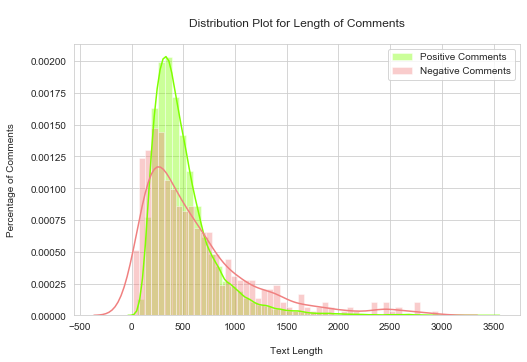

In [101]:
sns.set_style("whitegrid")
plt.figure(figsize=(8,5))

sns.distplot(df_pos['text_length'], kde=True, bins=50, color='chartreuse')
sns.distplot(df_neg['text_length'], kde=True, bins=50, color='lightcoral')

plt.title('\nDistribution Plot for Length of Comments\n')
plt.legend(['Positive Comments', 'Negative Comments'])
plt.xlabel('\nText Length')
plt.ylabel('Percentage of Comments\n');

The mode for the text length of positive comments can be found more to the right than for the negative comments, which means most of the positive comments are longer than most of the negative comments. But the tail for negative comments is thicker.

### Removing Stopwords and POS except nouns

In [102]:
from nltk.corpus import stopwords

In [103]:
all_stoppers=stopwords.words()
neg_comments_clean = []
pos_comments_clean= []
for sentence in neg_comments:
    sentence_list = sentence.split()
    str_ = ''
    for word in sentence_list:
        if word not in all_stoppers:
            str_ += word
            str_ += ' '
    neg_comments_clean.append(str_)
    
for sentence in pos_comments:
    sentence_list = sentence.split()
    str_ = ''
    for word in sentence_list:
        if word not in all_stoppers:
            str_ += word
            str_ += ' '
    pos_comments_clean.append(str_)
    
nouns = [] #empty to array to hold all nouns
for i in neg_comments_clean:
    lines = i
    sentences = nltk.sent_tokenize(lines) #tokenize sentences
    for sentence in sentences:
         for word,pos in nltk.pos_tag(nltk.word_tokenize(sentence)):
            if (pos == 'NN' or pos == 'NNP' or pos == 'NNS' or pos == 'NNPS'):
                 nouns.append(word)

nouns_pos=[]
for i in pos_comments_clean:
    lines = i
    sentences = nltk.sent_tokenize(lines) #tokenize sentences
    for sentence in sentences:
         for word,pos in nltk.pos_tag(nltk.word_tokenize(sentence)):
            if (pos == 'NN' or pos == 'NNP' or pos == 'NNS' or pos == 'NNPS'):
                 nouns_pos.append(word)

# Step 8: Analysing Sentiments

##  (i) Analysing Postive reviews

## Method 1: Wordcloud

Wordcloud is a technique that shows the words which are the most frequent in the given text.  

In [104]:
from wordcloud import WordCloud



### Removing Stopwords

In [105]:
all_stopwords = stopwords.words('english')
all_stopwords.extend(['great','Seattle','Kelly','loved','would','stay','left']) #change POS
for i in pos_comments_clean:
    if i not in nouns_pos:
        all_stopwords.append(i)


In [106]:
pos_comments_clean

['Cute cozy place. Perfect location everything! ',
 'Kelly great room central location. Beautiful building , architecture style really like. We felt guite home wish spent time. Went walk found Seattle Center major food festival progress. What treat. Visited Space Needle Chihuly Glass exhibit. Then Pikes Place Market. WOW. Thanks great stay. ',
 'Very spacious apartment, great neighborhood. This kind apartment I wish I had! Didn\'t really get meet Kelly I out, always readily available phone. I believe "issue" (if call that) finding place park, I sincerely doubt easy park anywhere residential area 5 pm Friday ',
 'Close Seattle Center offer - ballet, theater, museum, Space Needle, restaurants blocks away, Metropolitan (probably coolest grocer ever find). Easy find Kelly warm, welcoming, really interesting talk to. ',
 'Kelly great host accommodating great neighborhood. She great coffee I around much stay time I spent interacting pleasant. The apartment great location close Seattle Center

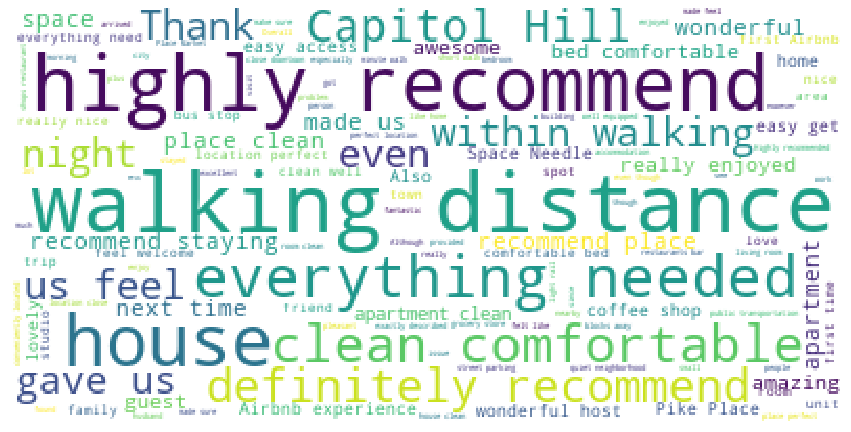

In [107]:
wordcloud = WordCloud(max_font_size=80, max_words=500,stopwords = all_stopwords,background_color='white').generate(str(pos_comments_clean))
plt.figure(figsize=(15,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

This figure shows the words that are most commonly found in positive comments. The larger the font, the more frequent it appears. Using the Wordcloud, we can deduce that users favour apartments in central locations, as there is little travelling time and a wide selection of shops nearby.

### Inference: It is difficult to draw clear inference and hence Wordcloud is a poor visualizing technique.

## Method 2: Frequency Disytibution using Yellowbrick library

Another method for visually exploring text is with frequency distributions. In the context of a text corpus, such a distribution tells us the prevalence of certain words. Here we use the Yellowbrick library.

In [108]:
# importing libraries
from sklearn.feature_extraction.text import CountVectorizer
from yellowbrick.text.freqdist import FreqDistVisualizer
from yellowbrick.style import set_palette

//anaconda3/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:300: UserWarning:

Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['00', '000', '000m', '007', '00am', '00pm', '01', '02', '03', '04', '05', '0500', '06', '0800', '09', '10', '100', '1000', '10000', '10003', '100am', '100m', '100s', '100th', '100x', '100yrds', '101', '103', '1030pm', '104', '1043194', '105', '106', '107', '1080p', '10am', '10ish', '10k', '10km', '10lb', '10m', '10min', '10mins', '10minute', '10minutes', '10mo', '10month', '10p', '10pm', '10th', '10uber', '10usd', '10x', '10x10', '10yr', '10分钟有超市', '10분', '11', '110', '1101', '111', '112', '113', '1130', '1130p', '1130pm', '114', '1145pm', '115', '116', '118', '119', '11a', '11am', '11days', '11ish', '11month', '11pm', '11th', '12', '120', '121', '122', '123', '1230', '123rd', '124', '125', '125th', '127', '128', '129', '12am', '12min', '12mins', '12nd', '12p', '12pm', '12th', '12years', '1

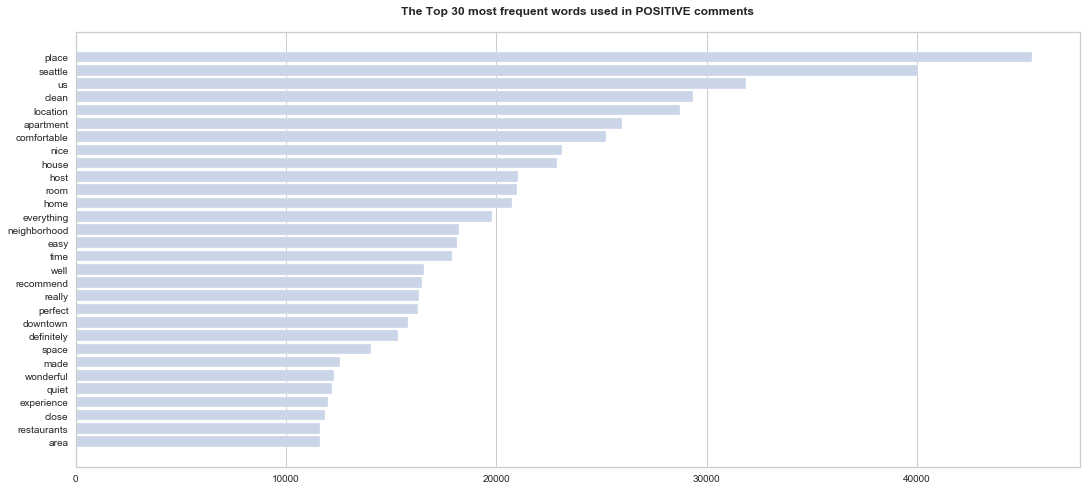

In [109]:
# vectorizing text
vectorizer = CountVectorizer(stop_words=all_stopwords)
docs = vectorizer.fit_transform(pos_comments_clean)
features = vectorizer.get_feature_names()

# preparing the plot
set_palette('pastel')
plt.figure(figsize=(18,8))
plt.title('The Top 30 most frequent words used in POSITIVE comments\n', fontweight='bold')

# instantiating and fitting the FreqDistVisualizer, plotting the top 30 most frequent terms
visualizer = FreqDistVisualizer(features=features, n=30)
visualizer.fit(docs)
visualizer.poof;

#scroll fown the pink warnings to see the frequency chart

A more informational visualisation of the word cloud. As we can see, Airbnb users like apartments that are clean, comfortable with great location.

## Method 3: Topic Modelling
An unsupervised machine learning technique for abstracting topics from collections of documents or, in our case, for identifying which topic is being discussed in a comment. In this section, we've used the Latent Dirichlet Allocation (LDA) technique.

In [110]:
# importing libraries
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
import string

In [111]:
# prepare the preprocessing
stop = set(all_stopwords)
exclude = set(string.punctuation)


### Lemmatization
Lemmatization is the process of grouping together the different inflected forms of a word so they can be analysed as a single item. So it links words with similar meaning to one word.

In [112]:
lemma = WordNetLemmatizer() 


### Preparing the dataset for topic modelling: 
 1: Create a Gensim dictionary from the normalized data
 
 2: Convert this to a bag-of-words corpus, and save both dictionary and corpus for future use.

In [113]:
# removing stopwords, punctuations and normalizing the corpus
def clean(doc):
    stop_free = " ".join([word for word in doc.lower().split() if word not in stop])
    punc_free = "".join(token for token in stop_free if token not in exclude)
    normalized = " ".join(lemma.lemmatize(word) for word in punc_free.split())
    return normalized

doc_clean = [clean(comment).split() for comment in pos_comments_clean]

In [114]:
from gensim import corpora
dictionary = corpora.Dictionary(doc_clean)
corpus = [dictionary.doc2bow(text) for text in doc_clean]

import pickle 


### Applying LDA on the processed dataset:

In [115]:
import gensim

# let LDA find 3 topics
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=3, id2word=dictionary, passes=15)


topics = ldamodel.print_topics(num_words=4)
for topic in topics:
    print(topic)

(0, '0.019*"place" + 0.019*"seattle" + 0.019*"u" + 0.018*"host"')
(1, '0.010*"room" + 0.010*"u" + 0.009*"kitchen" + 0.009*"bed"')
(2, '0.026*"place" + 0.024*"apartment" + 0.022*"location" + 0.020*"seattle"')


In [116]:
# now let LDA find 5 topics
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=5, id2word=dictionary, passes=15)


topics = ldamodel.print_topics(num_words=4)
for topic in topics:
    print(topic)


(0, '0.012*"room" + 0.011*"bed" + 0.009*"kitchen" + 0.008*"night"')
(1, '0.023*"downtown" + 0.022*"restaurant" + 0.020*"bus" + 0.018*"neighborhood"')
(2, '0.042*"clean" + 0.039*"place" + 0.030*"host" + 0.030*"nice"')
(3, '0.024*"home" + 0.023*"u" + 0.022*"seattle" + 0.016*"host"')
(4, '0.030*"place" + 0.028*"apartment" + 0.021*"seattle" + 0.021*"location"')


In [117]:
# and finally 10 topics
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=10, id2word=dictionary, passes=15)


topics = ldamodel.print_topics(num_words=4)
for topic in topics:
    print(topic)

(0, '0.029*"u" + 0.024*"apartment" + 0.023*"easy" + 0.021*"place"')
(1, '0.021*"kitchen" + 0.016*"u" + 0.016*"coffee" + 0.013*"well"')
(2, '0.032*"u" + 0.025*"seattle" + 0.018*"time" + 0.016*"place"')
(3, '0.037*"room" + 0.033*"nice" + 0.032*"house" + 0.031*"clean"')
(4, '0.103*"home" + 0.071*"house" + 0.038*"feel" + 0.033*"family"')
(5, '0.041*"place" + 0.037*"seattle" + 0.034*"location" + 0.029*"apartment"')
(6, '0.015*"room" + 0.014*"night" + 0.012*"bed" + 0.009*"apartment"')
(7, '0.175*"arrival" + 0.059*"day" + 0.055*"upon" + 0.051*"reservation"')
(8, '0.097*"parking" + 0.045*"street" + 0.031*"car" + 0.030*"view"')
(9, '0.029*"downtown" + 0.028*"restaurant" + 0.025*"place" + 0.024*"walk"')


Using the LDA, we can deduce that apartments that are easily accessible from the airport arrivals are favoured as well.

# From the above three techniques, we conclude the customers want the following:
1. A room or house with good bed, kitchen
2. A house with a good view
3. Good location
4. Markets, restaurants at walkable distance
5. Parking available

## (ii) Analysing  Negative reviews

### Removing Stopwords, Lemmatizing and removing all POS except nouns

In [118]:
all_stopwords = stopwords.words()
for i in neg_comments_clean:
    if i not in nouns:
        all_stopwords.append(i)

In [119]:
# prepare the preprocessing
stop = set(all_stopwords)
exclude = set(string.punctuation)
lemma = WordNetLemmatizer() 
#Lemmatization is the process of grouping together the different inflected forms of a word so they can be analysed as a single item. So it links words with similar meaning to one word.
# removing stopwords, punctuations and normalizing the corpus
def clean(doc):
    stop_free = " ".join([word for word in doc.lower().split() if word not in stop])
    punc_free = "".join(token for token in stop_free if token not in exclude)
    normalized = " ".join(lemma.lemmatize(word) for word in punc_free.split())
    return normalized

doc_clean = [clean(comment).split() for comment in neg_comments_clean]

In [120]:
neg_comments_clean

['Cozy private space! Close beach, shopping, main street restaurants. The thing little uncomfortable ( weather cold) bathroom/shower outside room, go patio main house. ',
 'The apartment advertised, 4 blocks Capitol Hill restaurants. No soap shampoo conditioner I went buy nearby convenience store. Nice touch bottle wine waiting us! ',
 "The apartment neat well located middle Belltown - quick walk fish market, space needle, attractions. The hosts responsive flexible checkout time (they guest evening offered later checkout wanted it). It's really host's fault, speakeasy next quite loud 3am even Sunday night. It especially bad first night private party going (screaming, loud dance music, general drunken disorderliness.. I even pop drink!) If plan going bed early light sleeper, probably best place (there ear plugs cup nightstand though, nice touch!) ",
 "Location directly major freeway #5. No air conditioning, suite 86 degrees arrived. Opened window cool shout window open due freeway noise

## Method 1: Wordcloud

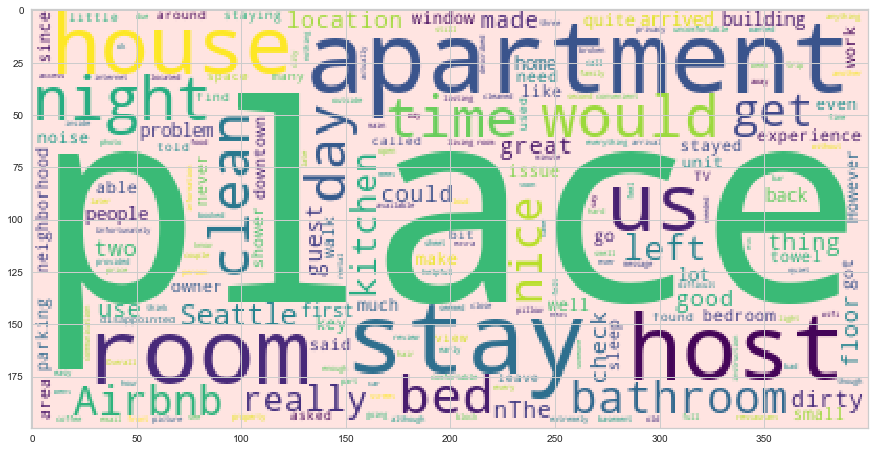

In [121]:
wordcloud2 = WordCloud(max_font_size=200, max_words=200, background_color="mistyrose",
                      stopwords=all_stoppers).generate(str(df_neg.comments.values))
                                                                     
plt.figure(figsize=(15,10))
plt.imshow(wordcloud2)
plt.show()

Again, can not infer anything clearly becaus eof the poor visualization of wordcloud

## Method 2: Frequency Distribution

//anaconda3/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:300: UserWarning:

Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['00', '000', '00pm', '10', '100', '1000', '10min', '10pm', '10x10', '11', '11am', '11pm', '12', '120', '121', '129', '13', '130pm', '137', '13pm', '14', '14th', '15', '15th', '16', '16th', '17', '180', '19', '1904', '1930s', '1am', '1km', '1st', '20', '200', '2011', '2014', '2015', '203', '20am', '22nd', '24', '25', '250', '26', '275', '28', '28th', '29', '2am', '2nd', '2pm', '30', '301', '302', '304', '308', '30am', '30pm', '319', '347', '35', '358', '379', '3am', '3bdhome', '3pm', '3rd', '40', '400', '420', '43', '430', '45', '46th', '48', '4am', '4th', '4½', '50', '56', '5min', '60', '600', '60s', '6am', '6pm', '70', '700', '70s', '72', '74', '75', '7am', '7pm', '80', '80s', '830pm', '84', '86', '8am', '90', '911', '91st', '9pm', 'aaron', 'aback', 'abandoned', 'able', 'abnb', 'abrupt', '

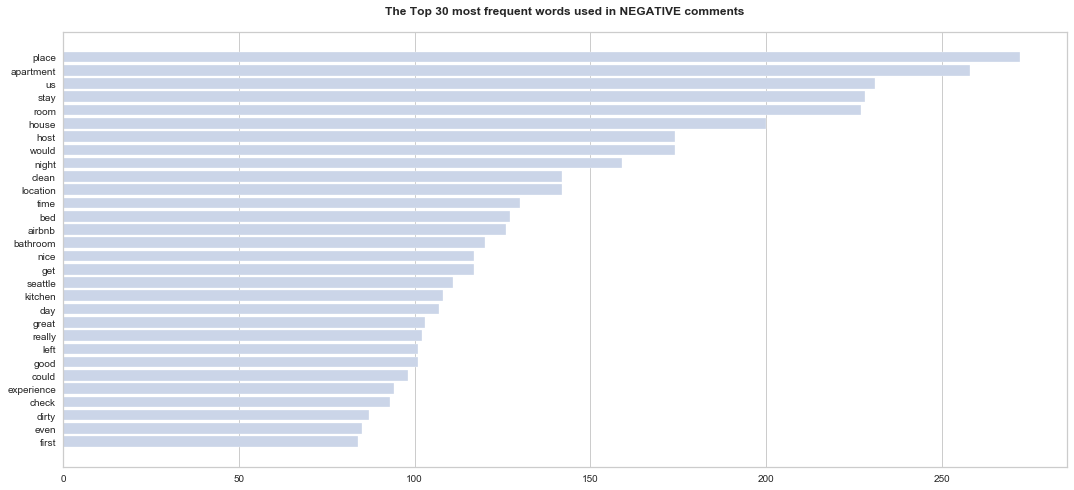

In [122]:
# vectorizing text
vectorizer = CountVectorizer(stop_words= all_stopwords)
docs = vectorizer.fit_transform(neg_comments_clean)
features = vectorizer.get_feature_names()

# preparing the plot
set_palette('pastel')
plt.figure(figsize=(18,8))
plt.title('The Top 30 most frequent words used in NEGATIVE comments\n', fontweight='bold')

# instantiating and fitting the FreqDistVisualizer, plotting the top 30 most frequent terms
visualizer = FreqDistVisualizer(features=features, n=30)
visualizer.fit(docs)
visualizer.poof;

#scroll down the pink box to see the frequency graph

This chart is quite similar to the chart for positive reviews. As such, we can deduce that apartments that lack these qualities tend to be poorly received by Airbnb users. In other words, users dislike apartments with inconvenient locations and poor amenities.

## Method 3: Topic modelling

In [123]:
# calling the cleaning function we defined earlier
doc_clean = [clean(comment).split() for comment in neg_comments]


In [124]:
# let LDA find 3 topics
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=3, id2word=dictionary, passes=15)

topics = ldamodel.print_topics(num_words=4)
for topic in topics:
    print(topic)

(0, '0.030*"place" + 0.025*"location" + 0.022*"seattle" + 0.020*"apartment"')
(1, '0.025*"u" + 0.017*"home" + 0.016*"seattle" + 0.016*"host"')
(2, '0.010*"kitchen" + 0.009*"room" + 0.009*"bed" + 0.007*"bathroom"')


In [125]:
# let LDA find 5 topics
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=5, id2word=dictionary, passes=15)


topics = ldamodel.print_topics(num_words=4)
for topic in topics:
    print(topic)

(0, '0.013*"room" + 0.010*"bed" + 0.009*"night" + 0.009*"kitchen"')
(1, '0.024*"home" + 0.022*"seattle" + 0.019*"house" + 0.016*"place"')
(2, '0.036*"place" + 0.026*"clean" + 0.024*"location" + 0.021*"apartment"')
(3, '0.024*"downtown" + 0.023*"restaurant" + 0.020*"walk" + 0.019*"seattle"')
(4, '0.104*"u" + 0.021*"made" + 0.019*"welcome" + 0.018*"even"')


In [ ]:
#10 topics
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=10, id2word=dictionary, passes=15)


topics = ldamodel.print_topics(num_words=4) 
for topic in topics:
    print(topic)

(0, '0.041*"apartment" + 0.039*"place" + 0.035*"walking" + 0.034*"restaurant"')
(1, '0.035*"downtown" + 0.031*"bus" + 0.021*"house" + 0.020*"easy"')
(2, '0.057*"home" + 0.027*"feel" + 0.027*"u" + 0.026*"made"')
(3, '0.025*"kitchen" + 0.018*"bed" + 0.016*"coffee" + 0.013*"comfortable"')
(4, '0.013*"night" + 0.012*"room" + 0.012*"day" + 0.012*"bed"')
(5, '0.050*"u" + 0.015*"place" + 0.015*"time" + 0.014*"even"')
(6, '0.048*"airbnb" + 0.045*"experience" + 0.041*"first" + 0.029*"seattle"')
(7, '0.029*"perfect" + 0.028*"stayed" + 0.023*"family" + 0.020*"day"')
(8, '0.040*"place" + 0.028*"host" + 0.027*"room" + 0.027*"clean"')
(9, '0.033*"apartment" + 0.032*"easy" + 0.031*"place" + 0.029*"clean"')


# From the above three techniques, we conclude the customers dislike apartments which have:
1. Long walking distance
2. Uphill apartment
3. Reservation issues on arrival
4. Dirty room, kitchen or bed
5. Inconvenient location


# Conclusion

Reviews and ratings have a huge role in determining whether a host is eligible to be a superhost. After analysing the positive and negative reviews, we can conclude that customers have a strong preference for apartments with:
1. An accessible location that is central 
2. Good kitchen and bed
3. Clean interior
4. Hassle-free transaction/ check-in and check-out 
5. Available parking
-----
With the above pointers in mind, our group suggests that the hosts should:

1. Since it is impossible for host to physically change the location of the listing, they can give directions to places of interest that are nearby. This allows customers to get around easily.
2. Invest in good amenities so that their customers can have an enjoyable stay.
3. Hire professional cleaners that can maintain the cleanliness of the apartment.
4. Communicate and clarify with the customers about the procedures to avoid confusion and issues down the road.

# Reflection/Learning points 

1. Our group learnt that there are many different models that we can use and we won't know which one is the best until we try them and get the output.
2. Exploration and having domain knowledge of the dataset is key in solving the problem statement.
3. We learnt about many new techniques that was not covered in the course such as logistic regression, random forest classifier, and the various text/sentiment analysis models. In the business context, these models are highly valuable as they are able to generate insights from unstructed text data which possess a lot of information.